<a href="https://colab.research.google.com/github/cabbi120101/final_multi/blob/main/Try/%ED%83%80%EC%9E%84%EB%9D%BC%EC%9D%B8%EC%9D%B4%EB%B2%A4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,100 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155047 files and d

In [351]:
import re
# Importing common libraries

import pandas as pd

from pandas import DataFrame

from pandas import Series

import numpy as np

import json

In [352]:
timeline_event = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/동욱코드모음/마지막프로젝트/4주차/데이터/timeline_event.csv")
timeline_event.head()

,Unnamed: 0,gameId,time_stamp,timeline,event_type,wardType,teamId,participantId,itemId,victimId,skillSlot,assistingParticipantIds,positionX,positionY,buildingType,laneType,towerType,monsterType,monsterSubType
0,0,5239649284,60019,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5239649284,60019,1263,SKILL_LEVEL_UP,NaN,NaN,2,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5239649284,60019,3410,ITEM_PURCHASED,NaN,NaN,8,3858.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,5239649284,60019,3839,ITEM_PURCHASED,NaN,NaN,4,2033.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5239649284,60019,3905,ITEM_PURCHASED,NaN,NaN,8,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
timeline_event

,Unnamed: 0,gameId,time_stamp,timeline,event_type,wardType,teamId,participantId,itemId,victimId,skillSlot,assistingParticipantIds,positionX,positionY,buildingType,laneType,towerType,monsterType,monsterSubType
0,0,5239649284,60019,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5239649284,60019,1263,SKILL_LEVEL_UP,NaN,NaN,2,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5239649284,60019,3410,ITEM_PURCHASED,NaN,NaN,8,3858.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,5239649284,60019,3839,ITEM_PURCHASED,NaN,NaN,4,2033.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5239649284,60019,3905,ITEM_PURCHASED,NaN,NaN,8,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7738999,7738999,5451530922,1380327,1335268,WARD_PLACED,UNDEFINED,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7739000,7739000,5451530922,1380327,1341849,BUILDING_KILL,NaN,100.0,0,NaN,NaN,NaN,[9],NaN,NaN,TOWER_BUILDING,MID_LANE,NEXUS_TURRET,NaN,NaN
7739001,7739001,5451530922,1380327,1343170,BUILDING_KILL,NaN,100.0,0,NaN,NaN,NaN,NaN,NaN,NaN,TOWER_BUILDING,TOP_LANE,INNER_TURRET,NaN,NaN
7739002,7739002,5451530922,1380327,1345383,CHAMPION_KILL,NaN,NaN,9,NaN,1.0,NaN,"[6, 7]",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [353]:
timeline_event.columns

Index(['Unnamed: 0', 'gameId', 'time_stamp', 'timeline', 'event_type',
       'wardType', 'teamId', 'participantId', 'itemId', 'victimId',
       'skillSlot', 'assistingParticipantIds', 'positionX', 'positionY',
       'buildingType', 'laneType', 'towerType', 'monsterType',
       'monsterSubType'],
      dtype='object')

In [ ]:
timeline_event['event_type'].unique()

array([nan, 'SKILL_LEVEL_UP', 'ITEM_PURCHASED', 'ITEM_DESTROYED',
       'WARD_PLACED', 'CHAMPION_KILL', 'WARD_KILL', 'ITEM_SOLD',
       'ITEM_UNDO', 'ELITE_MONSTER_KILL', 'BUILDING_KILL'], dtype=object)

In [ ]:
len(timeline_event['gameId'].unique())

11940

In [ ]:
timeline_event['time_stamp'] = (timeline_event['time_stamp']/60000).round()

In [ ]:
timeline_event['time_stamp'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.])

In [ ]:
time_15_event = timeline_event[timeline_event['time_stamp']<= 15]

In [ ]:
time_15_event.describe()

,Unnamed: 0,gameId,time_stamp,timeline,teamId,participantId,itemId,victimId,skillSlot,positionX,positionY
count,4.721135e+06,4.721135e+06,4.721135e+06,4.721135e+06,29150.000000,4.721135e+06,2.073295e+06,306864.000000,1.089826e+06,0.0,0.0
mean,3.851243e+06,5.392393e+09,8.054177e+00,4.524087e+05,152.116638,5.489691e+00,2.319208e+03,5.510353,2.021883e+00,NaN,NaN
std,2.236593e+06,4.391581e+07,4.359756e+00,2.640068e+05,49.956035,2.878951e+00,1.286734e+03,2.872519,1.064864e+00,NaN,NaN
min,0.000000e+00,5.239649e+09,1.000000e+00,0.000000e+00,100.000000,0.000000e+00,1.001000e+03,1.000000,1.000000e+00,NaN,NaN
25%,1.902484e+06,5.368018e+09,4.000000e+00,2.345250e+05,100.000000,3.000000e+00,1.055000e+03,3.000000,1.000000e+00,NaN,NaN
50%,3.855388e+06,5.401894e+09,8.000000e+00,4.555420e+05,200.000000,5.000000e+00,2.031000e+03,6.000000,2.000000e+00,NaN,NaN
75%,5.785030e+06,5.426283e+09,1.200000e+01,6.821940e+05,200.000000,8.000000e+00,3.067000e+03,8.000000,3.000000e+00,NaN,NaN
max,7.738817e+06,5.451531e+09,1.500000e+01,9.003410e+05,200.000000,1.000000e+01,8.001000e+03,10.000000,4.000000e+00,NaN,NaN


In [ ]:
time_15_event2= time_15_event[['gameId','time_stamp','event_type','teamId','participantId','buildingType','towerType','monsterType','monsterSubType']]

In [ ]:
time_15_event2

,gameId,time_stamp,event_type,teamId,participantId,buildingType,towerType,monsterType,monsterSubType
0,5239649284,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN
1,5239649284,1.0,SKILL_LEVEL_UP,NaN,2,NaN,NaN,NaN,NaN
2,5239649284,1.0,ITEM_PURCHASED,NaN,8,NaN,NaN,NaN,NaN
3,5239649284,1.0,ITEM_PURCHASED,NaN,4,NaN,NaN,NaN,NaN
4,5239649284,1.0,ITEM_PURCHASED,NaN,8,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7738813,5451530922,15.0,ITEM_PURCHASED,NaN,8,NaN,NaN,NaN,NaN
7738814,5451530922,15.0,ITEM_PURCHASED,NaN,8,NaN,NaN,NaN,NaN
7738815,5451530922,15.0,ITEM_PURCHASED,NaN,7,NaN,NaN,NaN,NaN
7738816,5451530922,15.0,ITEM_PURCHASED,NaN,7,NaN,NaN,NaN,NaN


In [ ]:
time_15_event2['event_type'].unique()

array([nan, 'SKILL_LEVEL_UP', 'ITEM_PURCHASED', 'ITEM_DESTROYED',
       'WARD_PLACED', 'CHAMPION_KILL', 'WARD_KILL', 'ITEM_SOLD',
       'ITEM_UNDO', 'ELITE_MONSTER_KILL', 'BUILDING_KILL'], dtype=object)

In [ ]:
time_15_event2.fillna(0)

,gameId,time_stamp,event_type,teamId,participantId,buildingType,towerType,monsterType,monsterSubType
0,5239649284,1.0,0,0.0,0,0,0,0,0
1,5239649284,1.0,SKILL_LEVEL_UP,0.0,2,0,0,0,0
2,5239649284,1.0,ITEM_PURCHASED,0.0,8,0,0,0,0
3,5239649284,1.0,ITEM_PURCHASED,0.0,4,0,0,0,0
4,5239649284,1.0,ITEM_PURCHASED,0.0,8,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7738813,5451530922,15.0,ITEM_PURCHASED,0.0,8,0,0,0,0
7738814,5451530922,15.0,ITEM_PURCHASED,0.0,8,0,0,0,0
7738815,5451530922,15.0,ITEM_PURCHASED,0.0,7,0,0,0,0
7738816,5451530922,15.0,ITEM_PURCHASED,0.0,7,0,0,0,0


In [ ]:
time_15_event2['event_type'].str.contains("CHAMPION_KILL|ELITE_MONSTER_KILL|BUILDING_KILL")

0            NaN
1          False
2          False
3          False
4          False
           ...  
7738813    False
7738814    False
7738815    False
7738816    False
7738817    False
Name: event_type, Length: 4721135, dtype: object

In [ ]:
time_15_event2.dropna(subset=['event_type'], axis = 0, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
time_15_event2

,gameId,time_stamp,event_type,teamId,participantId,buildingType,towerType,monsterType,monsterSubType
1,5239649284,1.0,SKILL_LEVEL_UP,NaN,2,NaN,NaN,NaN,NaN
2,5239649284,1.0,ITEM_PURCHASED,NaN,8,NaN,NaN,NaN,NaN
3,5239649284,1.0,ITEM_PURCHASED,NaN,4,NaN,NaN,NaN,NaN
4,5239649284,1.0,ITEM_PURCHASED,NaN,8,NaN,NaN,NaN,NaN
5,5239649284,1.0,ITEM_PURCHASED,NaN,8,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7738813,5451530922,15.0,ITEM_PURCHASED,NaN,8,NaN,NaN,NaN,NaN
7738814,5451530922,15.0,ITEM_PURCHASED,NaN,8,NaN,NaN,NaN,NaN
7738815,5451530922,15.0,ITEM_PURCHASED,NaN,7,NaN,NaN,NaN,NaN
7738816,5451530922,15.0,ITEM_PURCHASED,NaN,7,NaN,NaN,NaN,NaN


In [ ]:
time_15_event3 = time_15_event2[time_15_event2['event_type'].str.contains("CHAMPION_KILL|ELITE_MONSTER_KILL|BUILDING_KILL")]

In [ ]:
time_15_event3 = time_15_event3.reset_index()

In [ ]:
time_15_event3

,index,gameId,time_stamp,event_type,teamId,participantId,buildingType,towerType,monsterType,monsterSubType
0,42,5239649284,2.0,CHAMPION_KILL,NaN,9,NaN,NaN,NaN,NaN
1,57,5239649284,3.0,CHAMPION_KILL,NaN,5,NaN,NaN,NaN,NaN
2,69,5239649284,4.0,CHAMPION_KILL,NaN,10,NaN,NaN,NaN,NaN
3,87,5239649284,5.0,CHAMPION_KILL,NaN,6,NaN,NaN,NaN,NaN
4,89,5239649284,5.0,CHAMPION_KILL,NaN,6,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
362734,7738780,5451530922,15.0,CHAMPION_KILL,NaN,8,NaN,NaN,NaN,NaN
362735,7738781,5451530922,15.0,CHAMPION_KILL,NaN,8,NaN,NaN,NaN,NaN
362736,7738783,5451530922,15.0,BUILDING_KILL,100.0,9,TOWER_BUILDING,OUTER_TURRET,NaN,NaN
362737,7738784,5451530922,15.0,CHAMPION_KILL,NaN,8,NaN,NaN,NaN,NaN


In [ ]:
# death = []
# kill = []
# for i in range(len(time_15_event3)):
#     a = 0
#     b = 0
#     if time_15_event3['event_type'][i] == 'CHAMPION_KILL':
#         if time_15_event3['participantId'][i] >= 5:
#             a = 1
#             kill.append(a)
#             death.append(b)
#         else:
#             b = 1
#             kill.append(a)
#             death.append(b)

In [ ]:
new_team = []
for i in range(len(time_15_event3)):

    if time_15_event3['participantId'][i] >= 5:
        a = 200
        new_team.append(a)
    else:
        a = 100
        new_team.append(a)


In [ ]:
time_15_event3['teamId'] = new_team

In [ ]:
time_15_event3['teamId'].unique()

array([200, 100])

In [ ]:
time_15_event4 = pd.get_dummies(time_15_event3, columns=['event_type','teamId'])

In [ ]:
time_15_event4 = time_15_event4.drop(columns=['index','participantId','buildingType','towerType','monsterSubType'])

In [ ]:
time_15_event4 = pd.get_dummies(time_15_event4, columns=['monsterType'], dummy_na= False)

In [ ]:
time_15_event4 

,gameId,time_stamp,event_type_BUILDING_KILL,event_type_CHAMPION_KILL,event_type_ELITE_MONSTER_KILL,teamId_100,teamId_200,monsterType_DRAGON,monsterType_RIFTHERALD
0,5239649284,2.0,0,1,0,0,1,0,0
1,5239649284,3.0,0,1,0,0,1,0,0
2,5239649284,4.0,0,1,0,0,1,0,0
3,5239649284,5.0,0,1,0,0,1,0,0
4,5239649284,5.0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
362734,5451530922,15.0,0,1,0,0,1,0,0
362735,5451530922,15.0,0,1,0,0,1,0,0
362736,5451530922,15.0,1,0,0,0,1,0,0
362737,5451530922,15.0,0,1,0,0,1,0,0


In [ ]:
time_15_event5 = time_15_event4.groupby(['gameId','teamId_200','teamId_100'], as_index=False).sum()

In [ ]:
time_15_event5

,gameId,teamId_200,teamId_100,time_stamp,event_type_BUILDING_KILL,event_type_CHAMPION_KILL,event_type_ELITE_MONSTER_KILL,monsterType_DRAGON,monsterType_RIFTHERALD
0,5239649284,0,1,139.0,1,11,1,1,0
1,5239649284,1,0,223.0,2,18,2,1,1
2,5239767533,0,1,210.0,2,15,2,1,1
3,5239767533,1,0,64.0,0,6,1,1,0
4,5239772019,0,1,274.0,1,21,3,2,1
...,...,...,...,...,...,...,...,...,...
23846,5451502339,1,0,126.0,1,11,1,0,1
23847,5451514125,0,1,264.0,2,23,2,1,1
23848,5451514125,1,0,142.0,1,14,0,0,0
23849,5451530922,0,1,107.0,0,11,1,1,0


In [ ]:
time_15_event5['gameId'].unique()[0]

5239649284

In [ ]:
 time_15_event5[time_15_event5['gameId'] == time_15_event5['gameId'].unique()[0]]

,gameId,teamId_200,teamId_100,time_stamp,event_type_BUILDING_KILL,event_type_CHAMPION_KILL,event_type_ELITE_MONSTER_KILL,monsterType_DRAGON,monsterType_RIFTHERALD
0,5239649284,0,1,139.0,1,11,1,1,0
1,5239649284,1,0,223.0,2,18,2,1,1


In [ ]:
one_game = time_15_event5[time_15_event5['gameId'] == 5239649284]
one_game

,gameId,teamId_200,teamId_100,time_stamp,event_type_BUILDING_KILL,event_type_CHAMPION_KILL,event_type_ELITE_MONSTER_KILL,monsterType_DRAGON,monsterType_RIFTHERALD
0,5239649284,0,1,139.0,1,11,1,1,0
1,5239649284,1,0,223.0,2,18,2,1,1


### 죽음

In [ ]:
death = []

one_game = time_15_event5[time_15_event5['gameId'] == 5239649284]
death.append(one_game['event_type_CHAMPION_KILL'][1])
one_game['event_type_CHAMPION_KILL'][1]

18

In [ ]:
 death

[18]

In [ ]:
game_id = list(time_15_event5['gameId'].unique())

In [ ]:
game_id

[5239649284,
 5239767533,
 5239772019,
 5239782301,
 5239834854,
 5239846496,
 5239890686,
 5240672879,
 5240717531,
 5240782247,
 5241205891,
 5241334810,
 5241614037,
 5241657621,
 5241857122,
 5243233856,
 5243340663,
 5246160960,
 5246217885,
 5247986297,
 5248344404,
 5248467927,
 5248527201,
 5248592560,
 5249826004,
 5249906339,
 5250377449,
 5251604752,
 5252499227,
 5252562572,
 5252564868,
 5252905211,
 5253719162,
 5253859021,
 5253966997,
 5254005201,
 5254837267,
 5255365586,
 5255371960,
 5255456081,
 5255464504,
 5255519521,
 5255571436,
 5255597068,
 5256354769,
 5256401018,
 5257839642,
 5257844624,
 5258057417,
 5258156361,
 5258378512,
 5258429543,
 5259359970,
 5259916705,
 5260323626,
 5260401066,
 5260434500,
 5260571987,
 5260802128,
 5260969053,
 5261029921,
 5261044630,
 5261181992,
 5261778824,
 5261873608,
 5262284843,
 5262334139,
 5262655896,
 5262892777,
 5263808309,
 5263870270,
 5263945660,
 5263974344,
 5264051592,
 5264066517,
 5264091271,
 5264098250,

In [ ]:
death = []
gameId = []
for i in game_id:
    
    print(i)

    one_game = time_15_event5[time_15_event5['gameId'] == i]
    
    if len(one_game['event_type_CHAMPION_KILL']) == 2 :
        death.append(one_game['event_type_CHAMPION_KILL'].iloc[1])
        death.append(one_game['event_type_CHAMPION_KILL'].iloc[0])
        gameId.append(i)
        gameId.append(i)
    else:
        death.append('no')
        death.append('no')        
        gameId.append(i)
        gameId.append(i)        
    # print(one_game)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
5410395036
5410405464
5410410313
5410423153
5410424900
5410429997
5410431558
5410440533
5410446097
5410449382
5410452454
5410466408
5410472905
5410476555
5410479983
5410483548
5410486958
5410498157
5410501114
5410505776
5410508974
5410513807
5410518769
5410523431
5410528042
5410531054
5410543951
5410555639
5410557417
5410561187
5410566521
5410567720
5410570598
5410580477
5410588321
5410607142
5410625286
5410627740
5410635256
5410641803
5410650365
5410651865
5410657726
5410659564
5410660554
5410662664
5410668962
5410683373
5410690821
5410710335
5410711264
5410714146
5410715618
5410718725
5410722742
5410726720
5410737715
5410740061
5410741760
5410749209
5410751381
5410767748
5410771572
5410782434
5410792635
5410801944
5410805244
5410805307
5410807565
5410808787
5410810247
5410812796
5410817385
5410826134
5410853438
5410857357
5410858380
5410858989
5410872136
5410872539
5410880607
5410884735
5410885114
5410904408
5410907274
5410907913
5410909971
5410919

In [ ]:
death

[18,
 11,
 6,
 15,
 12,
 21,
 13,
 12,
 8,
 20,
 9,
 4,
 21,
 8,
 23,
 16,
 13,
 7,
 10,
 9,
 12,
 13,
 14,
 12,
 19,
 17,
 19,
 10,
 18,
 8,
 10,
 7,
 38,
 6,
 6,
 12,
 15,
 20,
 7,
 10,
 15,
 14,
 9,
 9,
 31,
 8,
 12,
 19,
 22,
 6,
 17,
 9,
 18,
 7,
 19,
 6,
 22,
 11,
 9,
 17,
 17,
 8,
 12,
 7,
 13,
 13,
 8,
 12,
 15,
 11,
 19,
 4,
 15,
 8,
 15,
 6,
 8,
 13,
 8,
 7,
 24,
 15,
 22,
 9,
 11,
 7,
 13,
 11,
 19,
 20,
 18,
 9,
 19,
 2,
 12,
 13,
 9,
 5,
 21,
 12,
 16,
 17,
 20,
 10,
 15,
 8,
 10,
 16,
 11,
 11,
 28,
 2,
 4,
 18,
 11,
 10,
 16,
 7,
 21,
 10,
 22,
 3,
 9,
 12,
 3,
 11,
 18,
 4,
 8,
 6,
 12,
 4,
 11,
 8,
 10,
 6,
 9,
 10,
 21,
 17,
 8,
 16,
 9,
 18,
 19,
 4,
 9,
 3,
 11,
 6,
 1,
 12,
 16,
 19,
 13,
 6,
 23,
 10,
 11,
 10,
 20,
 13,
 4,
 8,
 17,
 8,
 22,
 13,
 16,
 10,
 15,
 10,
 11,
 9,
 17,
 9,
 17,
 7,
 12,
 23,
 12,
 8,
 29,
 7,
 5,
 13,
 12,
 9,
 6,
 7,
 22,
 4,
 19,
 5,
 27,
 3,
 20,
 6,
 10,
 2,
 12,
 9,
 17,
 5,
 12,
 13,
 11,
 5,
 3,
 2,
 10,
 6,
 14,
 15,
 18,
 7,
 

In [ ]:
# def male_table(column):

#     name = column + '_' + "top5"
    

#     df.to_csv('/{}.csv'.format(name))

In [ ]:
def death(gameid):
    death = []
    print(gameid)
    one_game = time_15_event5[time_15_event5['gameId'] == gameid]
    death.append(one_game['event_type_CHAMPION_KILL'][1])
    death.append(one_game['event_type_CHAMPION_KILL'][0])
    print(one_game)
    return death

In [ ]:
def death(gameid):
    
    # print(gameid)
    # one_game = time_15_event5[time_15_event5['gameId'] == gameid]
    hi = time_15_event5[time_15_event5['gameId'] == gameid]['event_type_CHAMPION_KILL'][1]
    hello = time_15_event5[time_15_event5['gameId'] == gameid]['event_type_CHAMPION_KILL'][0]
    # print(one_game)
    return hi, hello

In [ ]:
hi = map(lambda x : death(x),game_id)

In [ ]:
hi

In [ ]:
death(5239649284)

(18, 11)

In [ ]:
time_15_event5[time_15_event5['gameId'] == 5239649284]['event_type_CHAMPION_KILL'][1]

18

In [ ]:
# for i in game_id:
#     death = []
#     print(i)
#     a,b = death(i)
#     death.append(a)
#     death.append(b)

5239649284


TypeError: ignored

In [ ]:
death(5239649284)

5239649284
       gameId  teamId_200  ...  monsterType_DRAGON  monsterType_RIFTHERALD
0  5239649284           0  ...                   1                       0
1  5239649284           1  ...                   1                       1

[2 rows x 9 columns]


[18, 11]

In [ ]:
only_death = pd.DataFrame()
only_death['death'] = death
only_death['gameId'] = gameId

In [ ]:
only_death

,death,gameId
0,18,5239649284
1,11,5239649284
2,6,5239767533
3,15,5239767533
4,12,5239772019
...,...,...
23875,7,5451502339
23876,14,5451514125
23877,23,5451514125
23878,17,5451530922


In [ ]:
time_15_event5['death'] = only_death['death']

In [ ]:
time_15_event5

,gameId,teamId_200,teamId_100,time_stamp,event_type_BUILDING_KILL,event_type_CHAMPION_KILL,event_type_ELITE_MONSTER_KILL,monsterType_DRAGON,monsterType_RIFTHERALD,death
0,5239649284,0,1,139.0,1,11,1,1,0,18
1,5239649284,1,0,223.0,2,18,2,1,1,11
2,5239767533,0,1,210.0,2,15,2,1,1,6
3,5239767533,1,0,64.0,0,6,1,1,0,15
4,5239772019,0,1,274.0,1,21,3,2,1,12
...,...,...,...,...,...,...,...,...,...,...
23846,5451502339,1,0,126.0,1,11,1,0,1,21
23847,5451514125,0,1,264.0,2,23,2,1,1,14
23848,5451514125,1,0,142.0,1,14,0,0,0,10
23849,5451530922,0,1,107.0,0,11,1,1,0,5


In [ ]:
# all_data = pd.merge(only_death,time_15_event5)

In [ ]:
# all_data

,death,gameId,teamId_200,teamId_100,time_stamp,event_type_BUILDING_KILL,event_type_CHAMPION_KILL,event_type_ELITE_MONSTER_KILL,monsterType_DRAGON,monsterType_RIFTHERALD
0,18,5239649284,0,1,139.0,1,11,1,1,0
1,18,5239649284,1,0,223.0,2,18,2,1,1
2,11,5239649284,0,1,139.0,1,11,1,1,0
3,11,5239649284,1,0,223.0,2,18,2,1,1
4,6,5239767533,0,1,210.0,2,15,2,1,1
...,...,...,...,...,...,...,...,...,...,...
47697,23,5451514125,1,0,142.0,1,14,0,0,0
47698,17,5451530922,0,1,107.0,0,11,1,1,0
47699,17,5451530922,1,0,189.0,2,17,1,0,1
47700,11,5451530922,0,1,107.0,0,11,1,1,0


In [ ]:
#  pd.merge(only_death,time_15_event5, how='outer',on='gameId')

,death,teamId_200,teamId_100,time_stamp,event_type_BUILDING_KILL,event_type_CHAMPION_KILL,event_type_ELITE_MONSTER_KILL,monsterType_DRAGON,monsterType_RIFTHERALD
gameId,,,,,,,,,
5239649284,18.0,0,1,139.0,1,11,1,1,0
5239649284,18.0,1,0,223.0,2,18,2,1,1
5239649284,11.0,0,1,139.0,1,11,1,1,0
5239649284,11.0,1,0,223.0,2,18,2,1,1
5239767533,6.0,0,1,210.0,2,15,2,1,1
...,...,...,...,...,...,...,...,...,...
5431495956,NaN,0,1,159.0,4,10,1,0,1
5434099576,NaN,1,0,98.0,2,7,2,1,1
5434120793,NaN,1,0,228.0,3,15,3,2,1


In [ ]:
# only_death.set_index('gameId', inplace=True)
# time_15_event5.set_index('gameId', inplace=True)

In [ ]:
# only_death.join(time_15_event5)

,death,teamId_200,teamId_100,time_stamp,event_type_BUILDING_KILL,event_type_CHAMPION_KILL,event_type_ELITE_MONSTER_KILL,monsterType_DRAGON,monsterType_RIFTHERALD
gameId,,,,,,,,,
5239649284,18,0,1,139.0,1,11,1,1,0
5239649284,18,1,0,223.0,2,18,2,1,1
5239649284,11,0,1,139.0,1,11,1,1,0
5239649284,11,1,0,223.0,2,18,2,1,1
5239767533,6,0,1,210.0,2,15,2,1,1
...,...,...,...,...,...,...,...,...,...
5451514125,23,1,0,142.0,1,14,0,0,0
5451530922,17,0,1,107.0,0,11,1,1,0
5451530922,17,1,0,189.0,2,17,1,0,1


In [ ]:
# all_data

,death,gameId,teamId_200,teamId_100,time_stamp,event_type_BUILDING_KILL,event_type_CHAMPION_KILL,event_type_ELITE_MONSTER_KILL,monsterType_DRAGON,monsterType_RIFTHERALD
0,18,5239649284,0,1,139.0,1,11,1,1,0
1,18,5239649284,1,0,223.0,2,18,2,1,1
2,11,5239649284,0,1,139.0,1,11,1,1,0
3,11,5239649284,1,0,223.0,2,18,2,1,1
4,6,5239767533,0,1,210.0,2,15,2,1,1
...,...,...,...,...,...,...,...,...,...,...
47639,23,5451514125,1,0,142.0,1,14,0,0,0
47640,17,5451530922,0,1,107.0,0,11,1,1,0
47641,17,5451530922,1,0,189.0,2,17,1,0,1
47642,11,5451530922,0,1,107.0,0,11,1,1,0


In [354]:
game = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/동욱코드모음/마지막프로젝트/4주차/데이터/match_data_info.csv")
game.head()

,Unnamed: 0,gameId,gameDuration,gameVersion,blueWin,bluefirstBlood,bluefirstTower,bluefirstInhibitor,bluefirstBaron,bluefirstDragon,bluefirstRiftHerald,bluetowerKills,blueinhibitorKills,bluebaronKills,bluedragonKills,blueriftHeraldKills,redfirstBlood,redfristTower,redfirstInhibitor,redfirstBaron,redfirstDragon,redfirstRiftHerald,redtowerKills,redinhibitorKills,redbaronKills,reddragonKills,redriftHeraldKills
0,0,5094010678,919,11.6.365.1420,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,1,1
1,1,5094054930,941,11.6.365.1420,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,5,0,0,1,1
2,2,5094546803,957,11.6.365.1420,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,6,1,0,1,0
3,3,5094862932,1186,11.6.365.1420,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,6,1,0,3,1
4,4,5095007502,1210,11.6.365.1420,1,1,1,0,0,0,1,2,0,0,1,2,0,0,0,0,1,0,3,0,0,1,0


In [355]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22240 entries, 0 to 22239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           22240 non-null  int64 
 1   gameId               22240 non-null  int64 
 2   gameDuration         22240 non-null  int64 
 3   gameVersion          22240 non-null  object
 4   blueWin              22240 non-null  int64 
 5   bluefirstBlood       22240 non-null  int64 
 6   bluefirstTower       22240 non-null  int64 
 7   bluefirstInhibitor   22240 non-null  int64 
 8   bluefirstBaron       22240 non-null  int64 
 9   bluefirstDragon      22240 non-null  int64 
 10  bluefirstRiftHerald  22240 non-null  int64 
 11  bluetowerKills       22240 non-null  int64 
 12  blueinhibitorKills   22240 non-null  int64 
 13  bluebaronKills       22240 non-null  int64 
 14  bluedragonKills      22240 non-null  int64 
 15  blueriftHeraldKills  22240 non-null  int64 
 16  redf

In [356]:

game = game[['gameId','blueWin','bluefirstBlood','bluefirstInhibitor','bluefirstTower','bluefirstDragon','bluefirstRiftHerald','redfirstBlood','redfirstInhibitor','redfristTower','redfirstDragon','redfirstRiftHerald']]

In [357]:
game

,gameId,blueWin,bluefirstBlood,bluefirstInhibitor,bluefirstTower,bluefirstDragon,bluefirstRiftHerald,redfirstBlood,redfirstInhibitor,redfristTower,redfirstDragon,redfirstRiftHerald
0,5094010678,0,0,0,0,1,0,1,0,1,0,1
1,5094054930,0,1,0,0,0,0,0,0,1,1,1
2,5094546803,0,0,0,0,0,0,1,1,1,1,0
3,5094862932,0,1,0,0,0,0,0,1,1,1,1
4,5095007502,1,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
22235,5451510359,0,1,0,0,0,0,0,0,1,1,1
22236,5451514125,1,1,0,1,1,1,0,0,0,0,0
22237,5451515705,0,1,0,0,0,1,0,1,1,1,0
22238,5451530922,0,1,0,0,1,0,0,1,1,0,1


In [358]:
game.columns

Index(['gameId', 'blueWin', 'bluefirstBlood', 'bluefirstInhibitor',
       'bluefirstTower', 'bluefirstDragon', 'bluefirstRiftHerald',
       'redfirstBlood', 'redfirstInhibitor', 'redfristTower', 'redfirstDragon',
       'redfirstRiftHerald'],
      dtype='object')

In [ ]:
this_game_win = pd.merge(game,time_15_event5)

In [ ]:
this_game_win

,gameId,blueWin,bluefirstBlood,bluefirstInhibitor,bluefirstTower,bluefirstDragon,bluefirstRiftHerald,redfirstBlood,redfirstInhibitor,redfristTower,redfirstDragon,redfirstRiftHerald,teamId_200,teamId_100,time_stamp,event_type_BUILDING_KILL,event_type_CHAMPION_KILL,event_type_ELITE_MONSTER_KILL,monsterType_DRAGON,monsterType_RIFTHERALD,death
0,5239649284,1,0,1,1,1,0,1,0,0,0,1,0,1,139.0,1,11,1,1,0,18
1,5239649284,1,0,1,1,1,0,1,0,0,0,1,1,0,223.0,2,18,2,1,1,11
2,5239767533,1,1,0,1,0,1,0,0,0,1,0,0,1,210.0,2,15,2,1,1,6
3,5239767533,1,1,0,1,0,1,0,0,0,1,0,1,0,64.0,0,6,1,1,0,15
4,5239772019,1,0,1,1,1,1,1,0,0,0,0,0,1,274.0,1,21,3,2,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23846,5451502339,1,1,1,0,1,0,0,0,1,0,1,1,0,126.0,1,11,1,0,1,21
23847,5451514125,1,1,0,1,1,1,0,0,0,0,0,0,1,264.0,2,23,2,1,1,14
23848,5451514125,1,1,0,1,1,1,0,0,0,0,0,1,0,142.0,1,14,0,0,0,10
23849,5451530922,0,1,0,0,1,0,0,1,1,0,1,0,1,107.0,0,11,1,1,0,5


In [ ]:
combi_win = []
for i in range(len(this_game_win)):
    if this_game_win['blueWin'][i] == 1:
        if this_game_win['teamId_100'][i] == 1:
            combi_win.append(1)
        else:
            combi_win.append(0)
    else:
        if this_game_win['teamId_100'][i] == 1:
            combi_win.append(0)
        else:
            combi_win.append(1)       

In [ ]:
len(combi_win)

23851

In [ ]:
this_game_win['combi_win'] = combi_win

In [ ]:
this_game_win = this_game_win.drop(columns=['blueWin'])

In [ ]:
this_game_win

,gameId,bluefirstBlood,bluefirstInhibitor,bluefirstTower,bluefirstDragon,bluefirstRiftHerald,redfirstBlood,redfirstInhibitor,redfristTower,redfirstDragon,redfirstRiftHerald,teamId_200,teamId_100,time_stamp,event_type_BUILDING_KILL,event_type_CHAMPION_KILL,event_type_ELITE_MONSTER_KILL,monsterType_DRAGON,monsterType_RIFTHERALD,death,combi_win
0,5239649284,0,1,1,1,0,1,0,0,0,1,0,1,139.0,1,11,1,1,0,18,1
1,5239649284,0,1,1,1,0,1,0,0,0,1,1,0,223.0,2,18,2,1,1,11,0
2,5239767533,1,0,1,0,1,0,0,0,1,0,0,1,210.0,2,15,2,1,1,6,1
3,5239767533,1,0,1,0,1,0,0,0,1,0,1,0,64.0,0,6,1,1,0,15,0
4,5239772019,0,1,1,1,1,1,0,0,0,0,0,1,274.0,1,21,3,2,1,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23846,5451502339,1,1,0,1,0,0,0,1,0,1,1,0,126.0,1,11,1,0,1,21,0
23847,5451514125,1,0,1,1,1,0,0,0,0,0,0,1,264.0,2,23,2,1,1,14,1
23848,5451514125,1,0,1,1,1,0,0,0,0,0,1,0,142.0,1,14,0,0,0,10,0
23849,5451530922,1,0,0,1,0,0,1,1,0,1,0,1,107.0,0,11,1,1,0,5,0


In [ ]:
new_game = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/동욱코드모음/마지막프로젝트/4주차/파생데이터/new_tag_with_gameId.csv")
new_game.head()

,Unnamed: 0,ad,ap,x,포킹,브루저,누커,탱커,보조,slow,stun,air,combi_win,gameId
0,0,3.0,2.0,0.0,2.0,3.0,1.0,0.0,0.0,2.0,4.0,2.0,1.0,5.094011e+09
1,1,3.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,4.0,3.0,3.0,0.0,5.094011e+09
2,2,3.0,2.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,5.094055e+09
3,3,2.0,1.0,2.0,1.0,1.0,0.0,2.0,0.0,4.0,1.0,5.0,0.0,5.094055e+09
4,4,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,4.0,2.0,2.0,1.0,5.094547e+09


In [ ]:
game_event_champ = pd.merge(this_game_win,new_game)

In [ ]:
game_event_champ.to_csv("/content/drive/MyDrive/Colab Notebooks/동욱코드모음/마지막프로젝트/4주차/파생데이터/game_event_champ3.csv")

In [ ]:
game_event_champ

,gameId,bluefirstBlood,bluefirstInhibitor,bluefirstTower,bluefirstDragon,bluefirstRiftHerald,redfirstBlood,redfirstInhibitor,redfristTower,redfirstDragon,redfirstRiftHerald,teamId_200,teamId_100,time_stamp,event_type_BUILDING_KILL,event_type_CHAMPION_KILL,event_type_ELITE_MONSTER_KILL,monsterType_DRAGON,monsterType_RIFTHERALD,death,combi_win,Unnamed: 0,ad,ap,x,포킹,브루저,누커,탱커,보조,slow,stun,air
0,5239649284,0,1,1,1,0,1,0,0,0,1,0,1,139.0,1,11,1,1,0,18,1,28,3.0,1.0,1.0,2.0,0.0,2.0,1.0,0.0,3.0,4.0,1.0
1,5239649284,0,1,1,1,0,1,0,0,0,1,1,0,223.0,2,18,2,1,1,11,0,29,3.0,1.0,1.0,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0
2,5239767533,1,0,1,0,1,0,0,0,1,0,0,1,210.0,2,15,2,1,1,6,1,30,3.0,1.0,1.0,1.0,3.0,0.0,1.0,0.0,5.0,2.0,4.0
3,5239767533,1,0,1,0,1,0,0,0,1,0,1,0,64.0,0,6,1,1,0,15,0,31,4.0,1.0,0.0,2.0,3.0,1.0,0.0,0.0,2.0,4.0,2.0
4,5239772019,0,1,1,1,1,1,0,0,0,0,0,1,274.0,1,21,3,2,1,12,1,32,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,4.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23846,5451502339,1,1,0,1,0,0,0,1,0,1,1,0,126.0,1,11,1,0,1,21,0,44469,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,4.0,1.0
23847,5451514125,1,0,1,1,1,0,0,0,0,0,0,1,264.0,2,23,2,1,1,14,1,44472,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0,3.0,1.0
23848,5451514125,1,0,1,1,1,0,0,0,0,0,1,0,142.0,1,14,0,0,0,10,0,44473,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,6.0,1.0
23849,5451530922,1,0,0,1,0,0,1,1,0,1,0,1,107.0,0,11,1,1,0,5,0,44477,3.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,5.0,0.0,3.0


In [ ]:
len(game_event_champ['gameId'].unique())

11940

In [ ]:
game_event_champ = game_event_champ.drop(columns=['time_stamp','gameId','Unnamed: 0'])

In [ ]:
game_event_champ

,bluefirstBlood,bluefirstInhibitor,bluefirstTower,bluefirstDragon,bluefirstRiftHerald,redfirstBlood,redfirstInhibitor,redfristTower,redfirstDragon,redfirstRiftHerald,teamId_200,teamId_100,event_type_BUILDING_KILL,event_type_CHAMPION_KILL,event_type_ELITE_MONSTER_KILL,monsterType_DRAGON,monsterType_RIFTHERALD,death,combi_win,ad,ap,x,포킹,브루저,누커,탱커,보조,slow,stun,air
0,0,1,1,1,0,1,0,0,0,1,0,1,1,11,1,1,0,18,1,3.0,1.0,1.0,2.0,0.0,2.0,1.0,0.0,3.0,4.0,1.0
1,0,1,1,1,0,1,0,0,0,1,1,0,2,18,2,1,1,11,0,3.0,1.0,1.0,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0
2,1,0,1,0,1,0,0,0,1,0,0,1,2,15,2,1,1,6,1,3.0,1.0,1.0,1.0,3.0,0.0,1.0,0.0,5.0,2.0,4.0
3,1,0,1,0,1,0,0,0,1,0,1,0,0,6,1,1,0,15,0,4.0,1.0,0.0,2.0,3.0,1.0,0.0,0.0,2.0,4.0,2.0
4,0,1,1,1,1,1,0,0,0,0,0,1,1,21,3,2,1,12,1,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,4.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23846,1,1,0,1,0,0,0,1,0,1,1,0,1,11,1,0,1,21,0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,4.0,1.0
23847,1,0,1,1,1,0,0,0,0,0,0,1,2,23,2,1,1,14,1,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0,3.0,1.0
23848,1,0,1,1,1,0,0,0,0,0,1,0,1,14,0,0,0,10,0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,6.0,1.0
23849,1,0,0,1,0,0,1,1,0,1,0,1,0,11,1,1,0,5,0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,5.0,0.0,3.0


In [ ]:
game_event_champ = game_event_champ.drop(columns=['teamId_200','event_type_ELITE_MONSTER_KILL'])

In [ ]:
game_event_champ

,bluefirstBlood,bluefirstInhibitor,bluefirstTower,bluefirstDragon,bluefirstRiftHerald,redfirstBlood,redfirstInhibitor,redfristTower,redfirstDragon,redfirstRiftHerald,teamId_100,event_type_BUILDING_KILL,event_type_CHAMPION_KILL,monsterType_DRAGON,monsterType_RIFTHERALD,death,combi_win,ad,ap,x,포킹,브루저,누커,탱커,보조,slow,stun,air
0,0,1,1,1,0,1,0,0,0,1,1,1,11,1,0,18,1,3.0,1.0,1.0,2.0,0.0,2.0,1.0,0.0,3.0,4.0,1.0
1,0,1,1,1,0,1,0,0,0,1,0,2,18,1,1,11,0,3.0,1.0,1.0,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0
2,1,0,1,0,1,0,0,0,1,0,1,2,15,1,1,6,1,3.0,1.0,1.0,1.0,3.0,0.0,1.0,0.0,5.0,2.0,4.0
3,1,0,1,0,1,0,0,0,1,0,0,0,6,1,0,15,0,4.0,1.0,0.0,2.0,3.0,1.0,0.0,0.0,2.0,4.0,2.0
4,0,1,1,1,1,1,0,0,0,0,1,1,21,2,1,12,1,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,4.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23846,1,1,0,1,0,0,0,1,0,1,0,1,11,0,1,21,0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,4.0,1.0
23847,1,0,1,1,1,0,0,0,0,0,1,2,23,1,1,14,1,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0,3.0,1.0
23848,1,0,1,1,1,0,0,0,0,0,0,1,14,0,0,10,0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,6.0,1.0
23849,1,0,0,1,0,0,1,1,0,1,1,0,11,1,0,5,0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,5.0,0.0,3.0


In [ ]:
game_event_champ = game_event_champ[game_event_champ['death'] != 'no']

In [ ]:
game_event_champ

,bluefirstBlood,bluefirstInhibitor,bluefirstTower,bluefirstDragon,bluefirstRiftHerald,redfirstBlood,redfirstInhibitor,redfristTower,redfirstDragon,redfirstRiftHerald,teamId_100,event_type_BUILDING_KILL,event_type_CHAMPION_KILL,monsterType_DRAGON,monsterType_RIFTHERALD,death,combi_win,ad,ap,x,포킹,브루저,누커,탱커,보조,slow,stun,air
0,0,1,1,1,0,1,0,0,0,1,1,1,11,1,0,18,1,3.0,1.0,1.0,2.0,0.0,2.0,1.0,0.0,3.0,4.0,1.0
1,0,1,1,1,0,1,0,0,0,1,0,2,18,1,1,11,0,3.0,1.0,1.0,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0
2,1,0,1,0,1,0,0,0,1,0,1,2,15,1,1,6,1,3.0,1.0,1.0,1.0,3.0,0.0,1.0,0.0,5.0,2.0,4.0
3,1,0,1,0,1,0,0,0,1,0,0,0,6,1,0,15,0,4.0,1.0,0.0,2.0,3.0,1.0,0.0,0.0,2.0,4.0,2.0
4,0,1,1,1,1,1,0,0,0,0,1,1,21,2,1,12,1,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,4.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23846,1,1,0,1,0,0,0,1,0,1,0,1,11,0,1,21,0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,4.0,1.0
23847,1,0,1,1,1,0,0,0,0,0,1,2,23,1,1,14,1,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0,3.0,1.0
23848,1,0,1,1,1,0,0,0,0,0,0,1,14,0,0,10,0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,6.0,1.0
23849,1,0,0,1,0,0,1,1,0,1,1,0,11,1,0,5,0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,5.0,0.0,3.0


In [ ]:
blue_team = game_event_champ[game_event_champ['teamId_100']==1].drop(columns=['redfirstBlood','redfirstInhibitor','redfristTower','redfirstDragon','redfirstRiftHerald','teamId_100'])
red_team = game_event_champ[game_event_champ['teamId_100']==0].drop(columns=['bluefirstBlood','bluefirstInhibitor','bluefirstTower','bluefirstDragon','bluefirstRiftHerald','teamId_100'])


In [ ]:
blue_team

,bluefirstBlood,bluefirstInhibitor,bluefirstTower,bluefirstDragon,bluefirstRiftHerald,event_type_BUILDING_KILL,event_type_CHAMPION_KILL,monsterType_DRAGON,monsterType_RIFTHERALD,death,combi_win,ad,ap,x,포킹,브루저,누커,탱커,보조,slow,stun,air
0,0,1,1,1,0,1,11,1,0,18,1,3.0,1.0,1.0,2.0,0.0,2.0,1.0,0.0,3.0,4.0,1.0
2,1,0,1,0,1,2,15,1,1,6,1,3.0,1.0,1.0,1.0,3.0,0.0,1.0,0.0,5.0,2.0,4.0
4,0,1,1,1,1,1,21,2,1,12,1,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,4.0,2.0,3.0
6,0,1,0,0,0,3,12,0,0,13,1,5.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,5.0,4.0,3.0
8,1,1,1,1,1,3,20,0,1,8,1,3.0,1.0,1.0,3.0,2.0,1.0,1.0,0.0,4.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23841,0,0,0,1,0,0,8,1,0,9,0,3.0,1.0,1.0,1.0,3.0,0.0,0.0,1.0,4.0,3.0,2.0
23843,1,1,1,1,1,0,9,1,1,11,1,2.0,2.0,1.0,3.0,3.0,0.0,1.0,0.0,4.0,5.0,2.0
23845,1,1,0,1,0,0,7,1,0,12,1,2.0,1.0,2.0,2.0,1.0,1.0,2.0,0.0,4.0,4.0,0.0
23847,1,0,1,1,1,2,23,1,1,14,1,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0,3.0,1.0


## 파이캐럿 설치

In [ ]:
pip install pycaret

     |████████████████████████████████| 266 kB 6.9 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 2.0 MB 6.0 MB/s 
     |████████████████████████████████| 14.6 MB 127 kB/s 
     |████████████████████████████████| 1.7 MB 48.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 111 kB 61.8 MB/s 
     |████████████████████████████████| 80 kB 7.5 MB/s 
     |████████████████████████████████| 271 kB 52.3 MB/s 
     |████████████████████████████████| 261 kB 53.5 MB/s 
     |████████████████████████████████| 6.8 MB 34.5 MB/s 
     |████████████████████████████████| 167 kB 38.8 MB/s 
     |████████████████████████████████| 1.3 MB 27.8 MB/s 
     |████████████████████████████████| 675 kB 37.3 MB/s 
     |████████████████████████████████| 102 kB 9.9 MB/s 
     |████████████████████

In [ ]:
pip install catboost

     |████████████████████████████████| 76.4 MB 21 kB/s 


In [ ]:
pip install -U scikit-learn

     |████████████████████████████████| 23.1 MB 1.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.4 requires scikit-learn==0.23.2, but you have scikit-learn 1.0 which is incompatible.


In [ ]:
pip install shap

     |████████████████████████████████| 356 kB 9.0 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491646 sha256=d6c63f085fdf5ad0ea0cde365e04a644b72f586dab35809f38bedb71e9960f8d
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
pip install scikit-learn==0.23.2

  Using cached scikit_learn-0.23.2-cp37-cp37m-manylinux1_x86_64.whl (6.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0
    Uninstalling scikit-learn-1.0:
      Successfully uninstalled scikit-learn-1.0


In [ ]:
import sklearn
print(sklearn.__version__)

0.23.2


In [ ]:
from pycaret.classification import *

## 15분 승률예측 모델제작

In [ ]:
# 아이디어 = 한 팀에 대한정보만 넣어서 하기(team)

In [ ]:
train = game_event_champ

In [ ]:
train = train.rename(columns={"포킹":"Poking","브루저":"Buriser","누커":"Nuker","탱커":"Tanker","보조":"Supporter"})

In [ ]:

test = train[-1000:]
train = train[:-1000]

In [ ]:
train

,bluefirstBlood,bluefirstInhibitor,bluefirstTower,bluefirstDragon,bluefirstRiftHerald,redfirstBlood,redfirstInhibitor,redfristTower,redfirstDragon,redfirstRiftHerald,teamId_100,event_type_BUILDING_KILL,event_type_CHAMPION_KILL,monsterType_DRAGON,monsterType_RIFTHERALD,death,combi_win,ad,ap,x,Poking,Buriser,Nuker,Tanker,Supporter,slow,stun,air
0,0,1,1,1,0,1,0,0,0,1,1,1,11,1,0,18,1,3.0,1.0,1.0,2.0,0.0,2.0,1.0,0.0,3.0,4.0,1.0
1,0,1,1,1,0,1,0,0,0,1,0,2,18,1,1,11,0,3.0,1.0,1.0,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0
2,1,0,1,0,1,0,0,0,1,0,1,2,15,1,1,6,1,3.0,1.0,1.0,1.0,3.0,0.0,1.0,0.0,5.0,2.0,4.0
3,1,0,1,0,1,0,0,0,1,0,0,0,6,1,0,15,0,4.0,1.0,0.0,2.0,3.0,1.0,0.0,0.0,2.0,4.0,2.0
4,0,1,1,1,1,1,0,0,0,0,1,1,21,2,1,12,1,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,4.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22846,1,1,1,1,1,0,0,0,0,0,0,0,16,1,1,19,0,2.0,2.0,1.0,4.0,2.0,1.0,0.0,1.0,4.0,3.0,2.0
22847,0,0,0,0,1,1,0,1,1,0,1,2,7,0,1,16,0,3.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,5.0,2.0,5.0
22848,0,0,0,0,1,1,0,1,1,0,0,0,22,1,0,25,1,3.0,1.0,1.0,2.0,3.0,0.0,0.0,1.0,3.0,2.0,1.0
22849,0,0,0,0,0,1,1,1,1,1,1,3,10,1,0,11,0,2.0,2.0,1.0,3.0,2.0,1.0,1.0,0.0,3.0,5.0,0.0


In [ ]:
train_15min = setup(data = train, target='combi_win')

,Description,Value
0,session_id,6443
1,Target,combi_win
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(22793, 28)"
5,Missing Values,False
6,Numeric Features,17
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
top5_info_name_all = compare_models(fold = 5, round = 3, sort = 'AUC', n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.895,0.941,0.891,0.899,0.895,0.790,0.790,7.066
lightgbm,Light Gradient Boosting Machine,0.893,0.940,0.890,0.896,0.893,0.787,0.787,0.392
rf,Random Forest Classifier,0.893,0.937,0.889,0.896,0.893,0.786,0.786,1.692
gbc,Gradient Boosting Classifier,0.884,0.936,0.877,0.891,0.884,0.769,0.769,1.652
et,Extra Trees Classifier,0.890,0.933,0.888,0.891,0.890,0.779,0.779,1.676
qda,Quadratic Discriminant Analysis,0.873,0.921,0.856,0.887,0.871,0.746,0.747,0.078
dt,Decision Tree Classifier,0.816,0.816,0.818,0.815,0.817,0.631,0.631,0.114
lr,Logistic Regression,0.711,0.780,0.681,0.725,0.702,0.421,0.422,1.886
lda,Linear Discriminant Analysis,0.710,0.780,0.665,0.732,0.697,0.420,0.422,0.108
ada,Ada Boost Classifier,0.708,0.778,0.693,0.715,0.704,0.415,0.415,0.612


In [ ]:
blended_info_name_all = blend_models(estimator_list = top5_info_name_all , fold = 5, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8894,0.9384,0.8899,0.8894,0.8897,0.7788,0.7788
1,0.8975,0.9395,0.8887,0.9051,0.8968,0.7951,0.7952
2,0.8969,0.9476,0.8956,0.8984,0.8970,0.7938,0.7938
3,0.9007,0.9420,0.8994,0.9022,0.9008,0.8013,0.8013
4,0.8938,0.9391,0.8838,0.9024,0.8930,0.7875,0.7877
Mean,0.8956,0.9413,0.8915,0.8995,0.8954,0.7913,0.7914
SD,0.0038,0.0034,0.0055,0.0055,0.0038,0.0076,0.0076


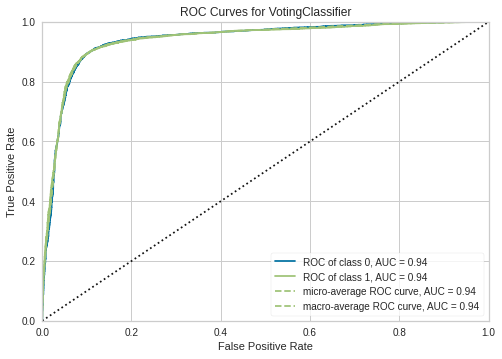

In [ ]:
plot_model(blended_info_name_all, plot='auc')

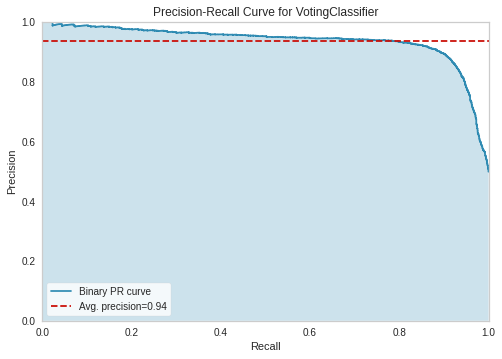

In [ ]:
plot_model(blended_info_name_all, plot='pr')

### 전체 3개만 일때

In [ ]:
top5_info_name_all3 = compare_models(fold = 5, round = 3, sort = 'AUC', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.707,0.781,0.676,0.720,0.697,0.413,0.414,1.240
lr,Logistic Regression,0.707,0.778,0.676,0.720,0.697,0.414,0.415,0.194
lda,Linear Discriminant Analysis,0.706,0.778,0.659,0.726,0.691,0.411,0.413,0.074
ada,Ada Boost Classifier,0.704,0.777,0.684,0.712,0.698,0.408,0.408,0.534
catboost,CatBoost Classifier,0.704,0.776,0.673,0.717,0.694,0.408,0.409,6.826
lightgbm,Light Gradient Boosting Machine,0.702,0.775,0.671,0.715,0.692,0.405,0.406,0.252
rf,Random Forest Classifier,0.690,0.755,0.668,0.698,0.683,0.380,0.381,1.822
nb,Naive Bayes,0.681,0.747,0.626,0.703,0.662,0.362,0.364,0.044
et,Extra Trees Classifier,0.675,0.738,0.661,0.680,0.670,0.350,0.350,1.878
qda,Quadratic Discriminant Analysis,0.651,0.706,0.601,0.677,0.628,0.302,0.310,0.052


In [ ]:
blended_info_name_all = blend_models(estimator_list = top5_info_name_all3 , fold = 5, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7055,0.7807,0.6781,0.7167,0.6969,0.4110,0.4116
1,0.7065,0.7832,0.6612,0.7263,0.6922,0.4129,0.4145
2,0.7140,0.7821,0.6838,0.7270,0.7047,0.4279,0.4286
3,0.7024,0.7704,0.6646,0.7185,0.6905,0.4048,0.4059
4,0.7112,0.7896,0.6702,0.7296,0.6986,0.4223,0.4237
Mean,0.7079,0.7812,0.6716,0.7236,0.6966,0.4158,0.4169
SD,0.0041,0.0062,0.0084,0.0050,0.0050,0.0083,0.0082


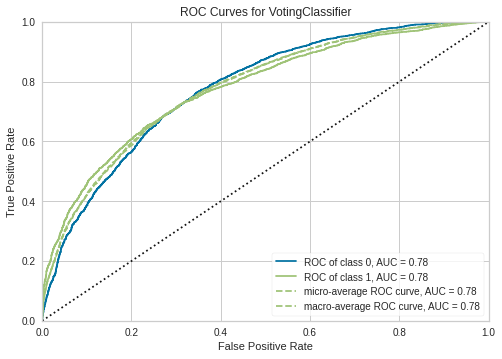

In [ ]:
plot_model(blended_info_name_all, plot='auc')

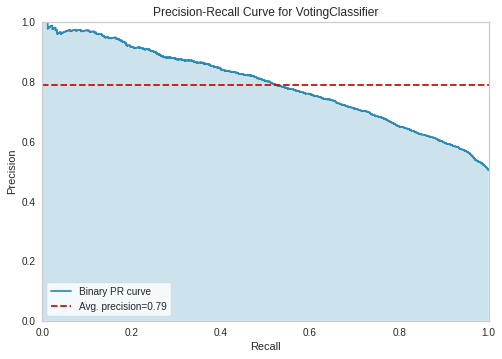

In [ ]:
plot_model(blended_info_name_all, plot='pr')

### 3개하면 약간 떨어지니 6가지로해볼까

In [ ]:
top5_info_name_all6 = compare_models(fold = 5, round = 3, sort = 'AUC', n_select = 6)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.707,0.781,0.676,0.720,0.697,0.413,0.414,1.238
lr,Logistic Regression,0.707,0.778,0.676,0.720,0.697,0.414,0.415,0.194
lda,Linear Discriminant Analysis,0.706,0.778,0.659,0.726,0.691,0.411,0.413,0.072
ada,Ada Boost Classifier,0.704,0.777,0.684,0.712,0.698,0.408,0.408,0.534
catboost,CatBoost Classifier,0.704,0.776,0.673,0.717,0.694,0.408,0.409,6.942
lightgbm,Light Gradient Boosting Machine,0.702,0.775,0.671,0.715,0.692,0.405,0.406,0.258
rf,Random Forest Classifier,0.690,0.755,0.668,0.698,0.683,0.380,0.381,1.804
nb,Naive Bayes,0.681,0.747,0.626,0.703,0.662,0.362,0.364,0.048
et,Extra Trees Classifier,0.675,0.738,0.661,0.680,0.670,0.350,0.350,1.884
qda,Quadratic Discriminant Analysis,0.651,0.706,0.601,0.677,0.628,0.302,0.310,0.048


In [ ]:
blended_info_name_all = blend_models(estimator_list = top5_info_name_all6 , fold = 5, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7021,0.7810,0.6781,0.7116,0.6945,0.4041,0.4046
1,0.7062,0.7841,0.6688,0.7221,0.6944,0.4122,0.4134
2,0.7121,0.7822,0.6794,0.7262,0.7020,0.4241,0.4250
3,0.7033,0.7713,0.6652,0.7197,0.6914,0.4066,0.4078
4,0.7130,0.7902,0.6733,0.7310,0.7010,0.4260,0.4274
Mean,0.7073,0.7817,0.6730,0.7221,0.6967,0.4146,0.4156
SD,0.0045,0.0061,0.0054,0.0065,0.0041,0.0089,0.0091


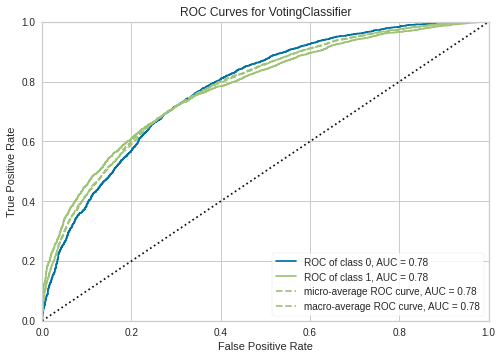

In [ ]:
plot_model(blended_info_name_all, plot='auc')

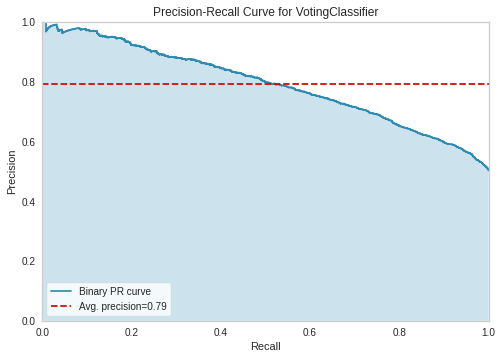

In [ ]:
plot_model(blended_info_name_all, plot='pr')

In [ ]:
model_catboost_info_name = create_model('catboost', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8897,0.9360,0.8874,0.8919,0.8897,0.7794,0.7794
1,0.8978,0.9413,0.8887,0.9057,0.8971,0.7957,0.7958
2,0.8947,0.9456,0.8925,0.8970,0.8947,0.7894,0.7894
3,0.9010,0.9418,0.9012,0.9012,0.9012,0.8019,0.8019
4,0.8928,0.9391,0.8844,0.9001,0.8922,0.7857,0.7858
Mean,0.8952,0.9408,0.8908,0.8992,0.8950,0.7904,0.7905
SD,0.0039,0.0032,0.0058,0.0046,0.0040,0.0078,0.0078


In [ ]:
model_catboost_info_name = tune_model(model_catboost_info_name, fold=5, optimize = 'AUC', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8891,0.9360,0.8893,0.8893,0.8893,0.7781,0.7781
1,0.8982,0.9400,0.8912,0.9042,0.8976,0.7963,0.7964
2,0.8935,0.9461,0.8900,0.8967,0.8934,0.7869,0.7869
3,0.9010,0.9412,0.9012,0.9012,0.9012,0.8019,0.8019
4,0.8919,0.9371,0.8819,0.9004,0.8911,0.7838,0.7839
Mean,0.8947,0.9401,0.8907,0.8984,0.8945,0.7894,0.7895
SD,0.0043,0.0035,0.0062,0.0051,0.0044,0.0086,0.0086


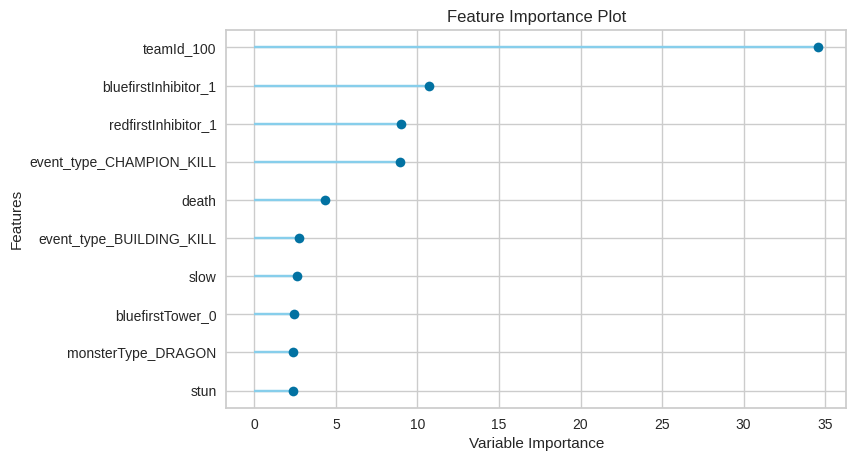

In [ ]:
plot_model(model_catboost_info_name, plot='feature')

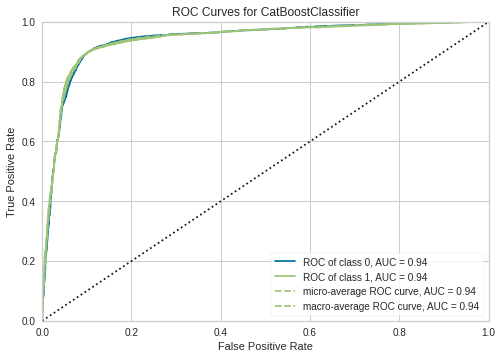

In [ ]:
plot_model(model_catboost_info_name, plot='auc')

In [ ]:
model_gbc_info_name = create_model('gbc', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7068,0.7795,0.6800,0.7178,0.6984,0.4135,0.4141
1,0.7043,0.7851,0.6706,0.7183,0.6937,0.4085,0.4094
2,0.7112,0.7798,0.6857,0.7218,0.7033,0.4223,0.4228
3,0.7021,0.7723,0.6696,0.7157,0.6919,0.4042,0.4050
4,0.7087,0.7898,0.6727,0.7244,0.6976,0.4173,0.4183
Mean,0.7066,0.7813,0.6757,0.7196,0.6970,0.4131,0.4139
SD,0.0032,0.0059,0.0062,0.0031,0.0040,0.0064,0.0063


In [ ]:
model_gbc_info_name = tune_model(model_gbc_info_name, fold=5, optimize = 'AUC', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7046,0.7789,0.6825,0.7134,0.6976,0.4091,0.4095
1,0.7055,0.7830,0.6681,0.7214,0.6938,0.4110,0.4121
2,0.7071,0.7797,0.6756,0.7203,0.6973,0.4141,0.4149
3,0.7024,0.7696,0.6652,0.7182,0.6907,0.4048,0.4059
4,0.7105,0.7868,0.6696,0.7289,0.6980,0.4210,0.4224
Mean,0.7060,0.7796,0.6722,0.7204,0.6955,0.4120,0.4130
SD,0.0027,0.0057,0.0062,0.0050,0.0028,0.0054,0.0056


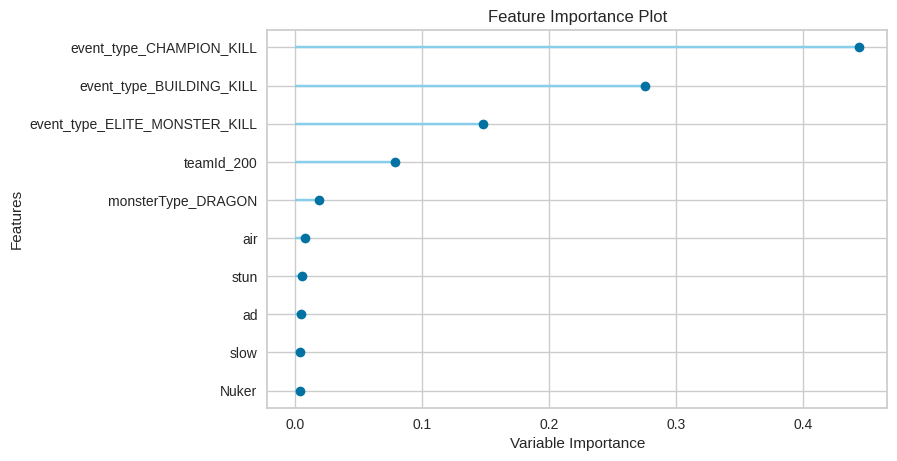

In [ ]:
plot_model(model_gbc_info_name, plot='feature')

In [ ]:
from pycaret.datasets import *
import joblib

In [ ]:
joblib.dump(blended_info_name_all, '/content/drive/MyDrive/Colab Notebooks/동욱코드모음/마지막프로젝트/4주차/모델/15min_win_predict_211004')

['/content/drive/MyDrive/Colab Notebooks/동욱코드모음/마지막프로젝트/4주차/모델/15min_win_predict_211004']

## 부분

In [ ]:
train = game_event_champ

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23793 entries, 0 to 23850
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bluefirstBlood            23793 non-null  int64  
 1   bluefirstInhibitor        23793 non-null  int64  
 2   bluefirstTower            23793 non-null  int64  
 3   bluefirstDragon           23793 non-null  int64  
 4   bluefirstRiftHerald       23793 non-null  int64  
 5   redfirstBlood             23793 non-null  int64  
 6   redfirstInhibitor         23793 non-null  int64  
 7   redfristTower             23793 non-null  int64  
 8   redfirstDragon            23793 non-null  int64  
 9   redfirstRiftHerald        23793 non-null  int64  
 10  teamId_100                23793 non-null  uint64 
 11  event_type_BUILDING_KILL  23793 non-null  uint8  
 12  event_type_CHAMPION_KILL  23793 non-null  uint8  
 13  monsterType_DRAGON        23793 non-null  uint8  
 14  monste

In [ ]:
train

,bluefirstBlood,bluefirstInhibitor,bluefirstTower,bluefirstDragon,bluefirstRiftHerald,redfirstBlood,redfirstInhibitor,redfristTower,redfirstDragon,redfirstRiftHerald,teamId_100,event_type_BUILDING_KILL,event_type_CHAMPION_KILL,monsterType_DRAGON,monsterType_RIFTHERALD,death,combi_win,ad,ap,x,포킹,브루저,누커,탱커,보조,slow,stun,air
0,0,1,1,1,0,1,0,0,0,1,1,1,11,1,0,18,1,3.0,1.0,1.0,2.0,0.0,2.0,1.0,0.0,3.0,4.0,1.0
1,0,1,1,1,0,1,0,0,0,1,0,2,18,1,1,11,0,3.0,1.0,1.0,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0
2,1,0,1,0,1,0,0,0,1,0,1,2,15,1,1,6,1,3.0,1.0,1.0,1.0,3.0,0.0,1.0,0.0,5.0,2.0,4.0
3,1,0,1,0,1,0,0,0,1,0,0,0,6,1,0,15,0,4.0,1.0,0.0,2.0,3.0,1.0,0.0,0.0,2.0,4.0,2.0
4,0,1,1,1,1,1,0,0,0,0,1,1,21,2,1,12,1,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,4.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23846,1,1,0,1,0,0,0,1,0,1,0,1,11,0,1,21,0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,4.0,1.0
23847,1,0,1,1,1,0,0,0,0,0,1,2,23,1,1,14,1,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0,3.0,1.0
23848,1,0,1,1,1,0,0,0,0,0,0,1,14,0,0,10,0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,6.0,1.0
23849,1,0,0,1,0,0,1,1,0,1,1,0,11,1,0,5,0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,5.0,0.0,3.0


In [ ]:
train_info_name_part = pd.DataFrame()

for i in range(len(train)):

    if i <=11000:

        if train['combi_win'].iloc[i] == 1:

            train_info_name_part = train_info_name_part.append(train.iloc[i])

        else:
            pass
    else:
        if train['combi_win'].iloc[i] == 0:
            train_info_name_part = train_info_name_part.append(train.iloc[i])
        else:
            pass

In [ ]:
train = train_info_name_part

In [ ]:
train = train.rename(columns={"포킹":"Poking","브루저":"Buriser","누커":"Nuker","탱커":"Tanker","보조":"Supporter"})

In [ ]:
train

,ad,air,ap,bluefirstBlood,bluefirstDragon,bluefirstInhibitor,bluefirstRiftHerald,bluefirstTower,combi_win,death,event_type_BUILDING_KILL,event_type_CHAMPION_KILL,monsterType_DRAGON,monsterType_RIFTHERALD,redfirstBlood,redfirstDragon,redfirstInhibitor,redfirstRiftHerald,redfristTower,slow,stun,teamId_100,x,Nuker,Supporter,Buriser,Tanker,Poking
0,3.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,18.0,1.0,11.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,4.0,1.0,1.0,2.0,0.0,0.0,1.0,2.0
2,3.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,6.0,2.0,15.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,2.0,1.0,1.0,0.0,0.0,3.0,1.0,1.0
4,2.0,3.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,12.0,1.0,21.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0,1.0,1.0,0.0,2.0,1.0,2.0
6,5.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,13.0,3.0,12.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,5.0,4.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0
8,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,3.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,1.0,1.0,1.0,0.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23841,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,0.0,8.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,4.0,3.0,1.0,1.0,0.0,1.0,3.0,0.0,1.0
23844,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,15.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0
23846,2.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,21.0,1.0,11.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0,0.0,1.0,1.0,0.0,2.0,1.0,2.0
23848,2.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,10.0,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,0.0,1.0,1.0,0.0,2.0,1.0,2.0


In [ ]:
test = train[-1000:]
train = train[:-1000]

In [ ]:
train_15min_2 = setup(data = train , target='combi_win')

,Description,Value
0,session_id,2952
1,Target,combi_win
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(10891, 28)"
5,Missing Values,False
6,Numeric Features,16
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
top5_info_name_part = compare_models(fold = 5, round = 3, sort = 'AUC', n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.890,0.939,0.886,0.896,0.891,0.781,0.781,3.446
lightgbm,Light Gradient Boosting Machine,0.885,0.935,0.886,0.886,0.886,0.770,0.770,0.260
rf,Random Forest Classifier,0.887,0.933,0.882,0.893,0.888,0.775,0.775,1.022
et,Extra Trees Classifier,0.886,0.932,0.881,0.891,0.886,0.771,0.771,1.002
gbc,Gradient Boosting Classifier,0.877,0.931,0.872,0.883,0.878,0.755,0.755,0.802
qda,Quadratic Discriminant Analysis,0.799,0.923,0.914,0.787,0.834,0.596,0.597,0.040
dt,Decision Tree Classifier,0.809,0.809,0.807,0.814,0.810,0.619,0.619,0.052
lr,Logistic Regression,0.713,0.786,0.687,0.728,0.707,0.426,0.427,1.290
lda,Linear Discriminant Analysis,0.712,0.786,0.670,0.734,0.701,0.423,0.425,0.050
ada,Ada Boost Classifier,0.706,0.780,0.695,0.714,0.704,0.412,0.413,0.320


In [ ]:
blended_info_name_all = blend_models(estimator_list = top5_info_name_part , fold = 5, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8925,0.9405,0.8802,0.9037,0.8918,0.7849,0.7852
1,0.8728,0.9279,0.8776,0.8708,0.8742,0.7455,0.7456
2,0.9082,0.9490,0.9036,0.9132,0.9084,0.8164,0.8164
3,0.8891,0.9375,0.8828,0.8956,0.8892,0.7782,0.7783
4,0.8904,0.9412,0.8841,0.8970,0.8905,0.7809,0.7809
Mean,0.8906,0.9392,0.8857,0.8961,0.8908,0.7812,0.7813
SD,0.0112,0.0068,0.0093,0.0141,0.0109,0.0225,0.0225


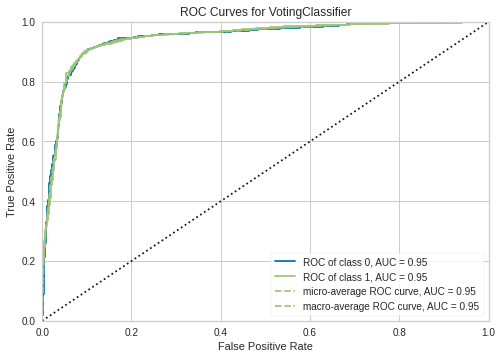

In [ ]:
plot_model(blended_info_name_all, plot='auc')

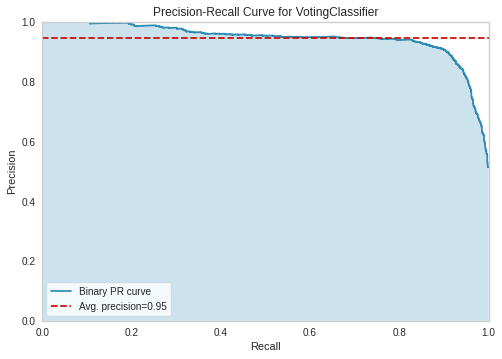

In [ ]:
plot_model(blended_info_name_all, plot='pr')

### 갯수 바꿔서

In [ ]:
top5_info_name_part3 = compare_models(fold = 5, round = 3, sort = 'AUC', n_select = 4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.714,0.783,0.691,0.728,0.709,0.428,0.428,0.176
gbc,Gradient Boosting Classifier,0.713,0.783,0.693,0.726,0.709,0.427,0.427,0.630
lda,Linear Discriminant Analysis,0.713,0.783,0.675,0.734,0.703,0.426,0.427,0.046
catboost,CatBoost Classifier,0.710,0.782,0.682,0.726,0.703,0.420,0.420,3.018
ada,Ada Boost Classifier,0.708,0.779,0.698,0.717,0.707,0.417,0.417,0.298
lightgbm,Light Gradient Boosting Machine,0.703,0.775,0.671,0.722,0.695,0.407,0.408,0.152
rf,Random Forest Classifier,0.692,0.760,0.668,0.707,0.687,0.385,0.386,1.082
nb,Naive Bayes,0.680,0.748,0.620,0.709,0.661,0.361,0.364,0.030
et,Extra Trees Classifier,0.681,0.746,0.670,0.689,0.680,0.363,0.363,1.072
knn,K Neighbors Classifier,0.656,0.699,0.639,0.665,0.652,0.311,0.312,0.284


In [ ]:
blended_info_name_all = blend_models(estimator_list = top5_info_name_part3 , fold = 5, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7111,0.7842,0.6891,0.7248,0.7065,0.4224,0.4230
1,0.7220,0.7940,0.6891,0.7420,0.7146,0.4444,0.4456
2,0.7096,0.7848,0.6671,0.7336,0.6988,0.4197,0.4215
3,0.7175,0.7899,0.6861,0.7357,0.7101,0.4352,0.4362
4,0.7240,0.7827,0.6939,0.7420,0.7172,0.4483,0.4492
Mean,0.7168,0.7871,0.6851,0.7356,0.7094,0.4340,0.4351
SD,0.0057,0.0042,0.0093,0.0064,0.0065,0.0114,0.0114


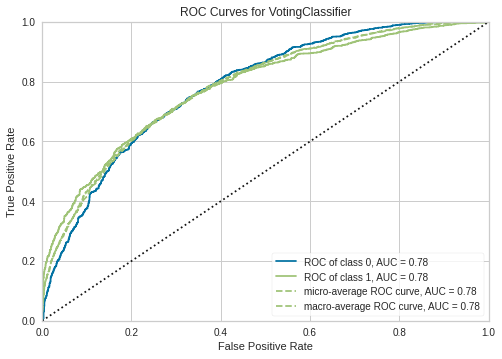

In [ ]:
plot_model(blended_info_name_all, plot='auc')

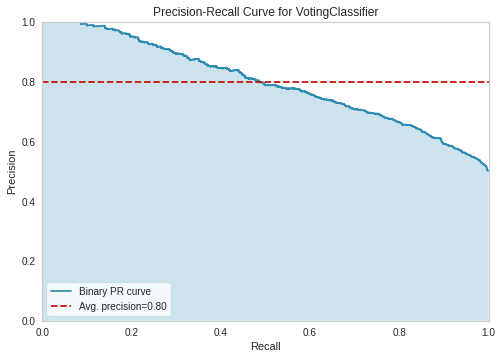

In [ ]:
plot_model(blended_info_name_all, plot='pr')

In [ ]:
top5_info_name_part6 = compare_models(fold = 5, round = 3, sort = 'AUC', n_select = 6)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.714,0.783,0.691,0.728,0.709,0.428,0.428,0.172
gbc,Gradient Boosting Classifier,0.713,0.783,0.693,0.726,0.709,0.427,0.427,0.630
lda,Linear Discriminant Analysis,0.713,0.783,0.675,0.734,0.703,0.426,0.427,0.046
catboost,CatBoost Classifier,0.710,0.782,0.682,0.726,0.703,0.420,0.420,3.080
ada,Ada Boost Classifier,0.708,0.779,0.698,0.717,0.707,0.417,0.417,0.308
lightgbm,Light Gradient Boosting Machine,0.703,0.775,0.671,0.722,0.695,0.407,0.408,0.160
rf,Random Forest Classifier,0.692,0.760,0.668,0.707,0.687,0.385,0.386,1.084
nb,Naive Bayes,0.680,0.748,0.620,0.709,0.661,0.361,0.364,0.030
et,Extra Trees Classifier,0.681,0.746,0.670,0.689,0.680,0.363,0.363,1.062
knn,K Neighbors Classifier,0.656,0.699,0.639,0.665,0.652,0.311,0.312,0.284


In [ ]:
blended_info_name_all = blend_models(estimator_list = top5_info_name_part6 , fold = 5, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7144,0.7836,0.6904,0.7291,0.7092,0.4290,0.4296
1,0.7168,0.7932,0.6852,0.7357,0.7096,0.4339,0.4350
2,0.7122,0.7846,0.6671,0.7378,0.7007,0.4250,0.4270
3,0.7168,0.7892,0.6913,0.7321,0.7111,0.4338,0.4345
4,0.7279,0.7837,0.6965,0.7469,0.7208,0.4561,0.4572
Mean,0.7176,0.7869,0.6861,0.7363,0.7103,0.4356,0.4367
SD,0.0054,0.0038,0.0102,0.0060,0.0064,0.0108,0.0107


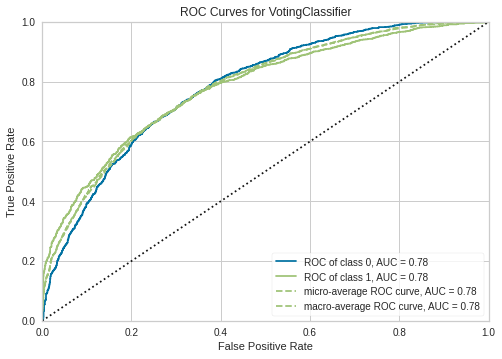

In [ ]:
plot_model(blended_info_name_all, plot='auc')

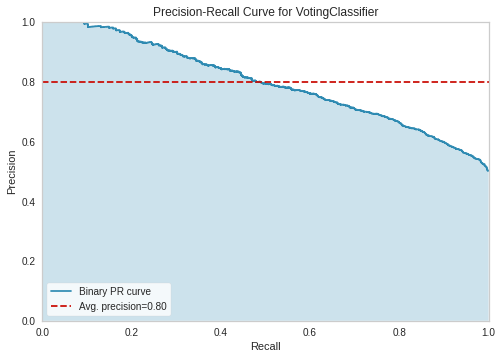

In [ ]:
plot_model(blended_info_name_all, plot='pr')

In [ ]:
model_catboost_info_name = create_model('catboost', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8905,0.9390,0.8815,0.8991,0.8902,0.7810,0.7812
1,0.8741,0.9267,0.8815,0.8702,0.8758,0.7482,0.7482
2,0.9049,0.9481,0.8997,0.9104,0.9050,0.8098,0.8099
3,0.8871,0.9394,0.8854,0.8901,0.8877,0.7743,0.7743
4,0.8950,0.9430,0.8802,0.9086,0.8942,0.7901,0.7905
Mean,0.8903,0.9393,0.8857,0.8957,0.8906,0.7807,0.7808
SD,0.0101,0.0071,0.0072,0.0147,0.0095,0.0202,0.0202


In [ ]:
model_catboost_info_name = tune_model(model_catboost_info_name, fold=5, optimize = 'AUC', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8898,0.9384,0.8789,0.9000,0.8893,0.7797,0.7799
1,0.8728,0.9271,0.8776,0.8708,0.8742,0.7455,0.7456
2,0.9069,0.9491,0.9049,0.9097,0.9073,0.8138,0.8138
3,0.8911,0.9382,0.8854,0.8971,0.8912,0.7822,0.7822
4,0.8898,0.9432,0.8815,0.8979,0.8896,0.7795,0.7797
Mean,0.8901,0.9392,0.8857,0.8951,0.8903,0.7801,0.7802
SD,0.0108,0.0072,0.0100,0.0130,0.0105,0.0216,0.0216


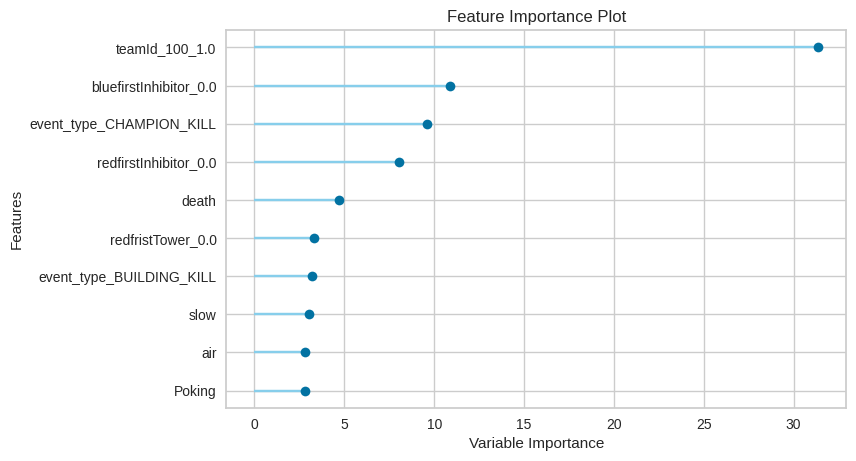

In [ ]:
plot_model(model_catboost_info_name, plot='feature')

In [ ]:
model_gbc_info_name = create_model('gbc', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7176,0.7842,0.7060,0.7267,0.7162,0.4354,0.4356
1,0.7181,0.7883,0.6969,0.7320,0.7140,0.4364,0.4370
2,0.7037,0.7803,0.6723,0.7218,0.6962,0.4078,0.4088
3,0.7011,0.7850,0.6848,0.7116,0.6980,0.4024,0.4027
4,0.7253,0.7795,0.7030,0.7394,0.7207,0.4508,0.4514
Mean,0.7132,0.7835,0.6926,0.7263,0.7090,0.4266,0.4271
SD,0.0092,0.0032,0.0125,0.0094,0.0100,0.0184,0.0184


In [ ]:
model_gbc_info_name = tune_model(model_gbc_info_name, fold=5, optimize = 'AUC', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7124,0.7831,0.6865,0.7280,0.7067,0.4251,0.4258
1,0.7194,0.7862,0.6943,0.7353,0.7142,0.4391,0.4398
2,0.7129,0.7746,0.7008,0.7223,0.7114,0.4259,0.4261
3,0.7011,0.7806,0.6796,0.7139,0.6963,0.4024,0.4029
4,0.7188,0.7770,0.7056,0.7282,0.7167,0.4377,0.4379
Mean,0.7129,0.7803,0.6934,0.7255,0.7091,0.4260,0.4265
SD,0.0066,0.0041,0.0094,0.0071,0.0072,0.0131,0.0131


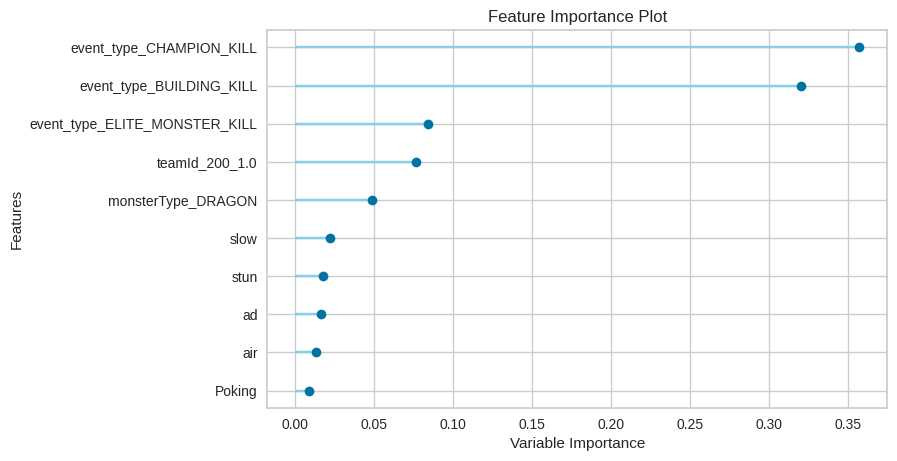

In [ ]:
plot_model(model_gbc_info_name, plot='feature')

In [ ]:
model_lr_info_name = create_model('lr', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7144,0.7804,0.6995,0.7248,0.7119,0.4289,0.4292
1,0.7188,0.7895,0.6995,0.7317,0.7152,0.4377,0.4382
2,0.7155,0.7813,0.6801,0.7363,0.7071,0.4314,0.4327
3,0.7083,0.7857,0.6809,0.7241,0.7019,0.4169,0.4176
4,0.7116,0.7778,0.6939,0.7230,0.7081,0.4233,0.4237
Mean,0.7137,0.7829,0.6908,0.7280,0.7088,0.4276,0.4283
SD,0.0036,0.0041,0.0086,0.0052,0.0045,0.0071,0.0071


In [ ]:
model_lr_info_name = tune_model(model_lr_info_name, fold=5, optimize = 'AUC', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7144,0.7803,0.6995,0.7248,0.7119,0.4289,0.4292
1,0.7181,0.7894,0.6995,0.7307,0.7148,0.4364,0.4368
2,0.7155,0.7814,0.6801,0.7363,0.7071,0.4314,0.4327
3,0.7083,0.7857,0.6809,0.7241,0.7019,0.4169,0.4176
4,0.7109,0.7778,0.6926,0.7226,0.7073,0.4220,0.4224
Mean,0.7134,0.7829,0.6905,0.7277,0.7086,0.4271,0.4277
SD,0.0035,0.0041,0.0086,0.0051,0.0044,0.0069,0.0069


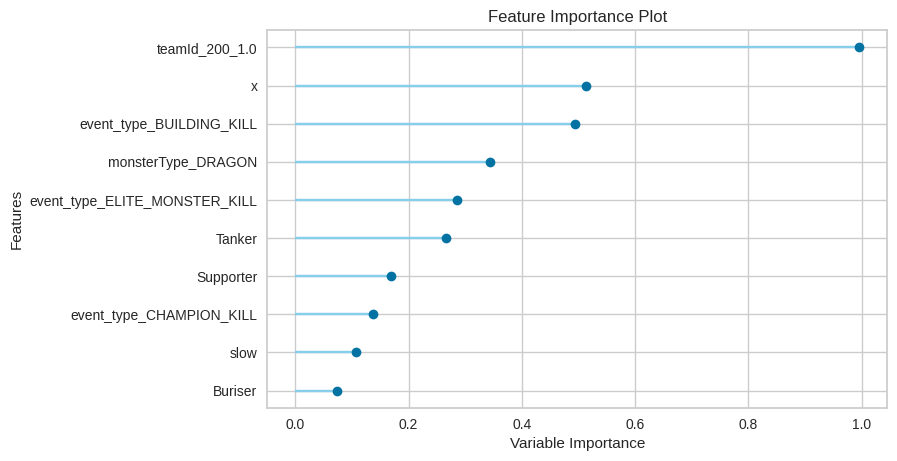

In [ ]:
plot_model(model_lr_info_name, plot='feature')

In [ ]:
joblib.dump(blended_info_name_all, '/content/drive/MyDrive/Colab Notebooks/동욱코드모음/마지막프로젝트/4주차/모델/15min_win_predict_part_211003')

['/content/drive/MyDrive/Colab Notebooks/동욱코드모음/마지막프로젝트/4주차/모델/15min_win_predict_part_211003']

## 팀 구분빼고하기

In [ ]:
train = game_event_champ

In [ ]:
train

,teamId_200,teamId_100,event_type_BUILDING_KILL,event_type_CHAMPION_KILL,event_type_ELITE_MONSTER_KILL,monsterType_DRAGON,monsterType_RIFTHERALD,combi_win,ad,ap,x,포킹,브루저,누커,탱커,보조,slow,stun,air
0,0,1,1,11,1,1,0,1,3.0,1.0,1.0,2.0,0.0,2.0,1.0,0.0,3.0,4.0,1.0
1,1,0,2,18,2,1,1,0,3.0,1.0,1.0,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0
2,0,1,2,15,2,1,1,1,3.0,1.0,1.0,1.0,3.0,0.0,1.0,0.0,5.0,2.0,4.0
3,1,0,0,6,1,1,0,0,4.0,1.0,0.0,2.0,3.0,1.0,0.0,0.0,2.0,4.0,2.0
4,0,1,1,21,3,2,1,1,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,4.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23846,1,0,1,11,1,0,1,0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,4.0,1.0
23847,0,1,2,23,2,1,1,1,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0,3.0,1.0
23848,1,0,1,14,0,0,0,0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,6.0,1.0
23849,0,1,0,11,1,1,0,0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,5.0,0.0,3.0


In [ ]:
train = train.drop(columns=['teamId_200','teamId_100'])

In [ ]:
test = train[-1000:]
train = train[:-1000]

In [ ]:
train_15min_3 = setup(data = train , target='combi_win')

,Description,Value
0,session_id,7354
1,Target,combi_win
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(22851, 17)"
5,Missing Values,False
6,Numeric Features,16
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
top5_info_name_all = compare_models(fold = 5, round = 3, sort = 'AUC', n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.692,0.758,0.663,0.706,0.684,0.384,0.385,0.968
gbc,Gradient Boosting Classifier,0.693,0.758,0.673,0.704,0.688,0.386,0.387,1.200
lda,Linear Discriminant Analysis,0.691,0.757,0.649,0.712,0.679,0.383,0.384,0.070
ada,Ada Boost Classifier,0.689,0.756,0.675,0.696,0.686,0.377,0.378,0.496
lightgbm,Light Gradient Boosting Machine,0.689,0.751,0.666,0.701,0.683,0.379,0.380,0.340
catboost,CatBoost Classifier,0.686,0.750,0.667,0.695,0.681,0.372,0.372,6.700
nb,Naive Bayes,0.677,0.740,0.617,0.705,0.658,0.355,0.358,0.042
rf,Random Forest Classifier,0.664,0.721,0.646,0.672,0.659,0.327,0.328,1.862
et,Extra Trees Classifier,0.650,0.706,0.642,0.656,0.649,0.301,0.301,1.970
knn,K Neighbors Classifier,0.638,0.681,0.616,0.647,0.631,0.275,0.276,0.960


In [ ]:
blended_info_name_all = blend_models(estimator_list = top5_info_name_all , fold = 5, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7021,0.7631,0.6704,0.7182,0.6935,0.4044,0.4053
1,0.6868,0.7563,0.6611,0.6993,0.6797,0.3737,0.3743
2,0.6899,0.7574,0.6716,0.6995,0.6853,0.3799,0.3802
3,0.6899,0.7560,0.6383,0.7147,0.6743,0.3802,0.3824
4,0.6996,0.7635,0.6663,0.7166,0.6905,0.3994,0.4004
Mean,0.6937,0.7592,0.6615,0.7097,0.6846,0.3875,0.3885
SD,0.0060,0.0033,0.0122,0.0084,0.0070,0.0121,0.0121


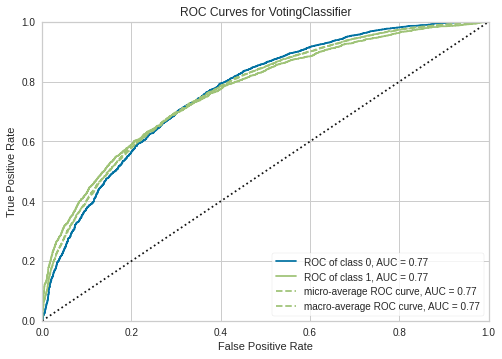

In [ ]:
plot_model(blended_info_name_all, plot='auc')

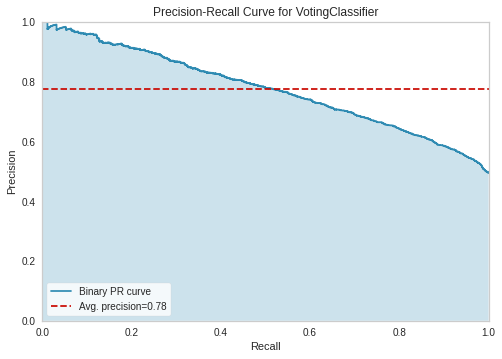

In [ ]:
plot_model(blended_info_name_all, plot='pr')

In [ ]:
model_lr_info_name = create_model('lr', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6996,0.7629,0.6692,0.7150,0.6913,0.3994,0.4002
1,0.6858,0.7537,0.6654,0.6962,0.6804,0.3718,0.3722
2,0.6877,0.7544,0.6704,0.6968,0.6834,0.3755,0.3758
3,0.6890,0.7554,0.6439,0.7106,0.6756,0.3783,0.3800
4,0.6974,0.7624,0.6669,0.7130,0.6891,0.3950,0.3959
Mean,0.6919,0.7578,0.6631,0.7063,0.6840,0.3840,0.3848
SD,0.0055,0.0040,0.0098,0.0081,0.0057,0.0111,0.0112


In [ ]:
model_lr_info_name = tune_model(model_lr_info_name, fold=5, optimize = 'AUC', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6993,0.7629,0.6667,0.7156,0.6903,0.3988,0.3997
1,0.6855,0.7537,0.6623,0.6970,0.6792,0.3712,0.3717
2,0.6855,0.7546,0.6636,0.6965,0.6796,0.3712,0.3716
3,0.6887,0.7555,0.6395,0.7121,0.6739,0.3777,0.3797
4,0.6965,0.7625,0.6631,0.7132,0.6873,0.3932,0.3942
Mean,0.6911,0.7579,0.6590,0.7069,0.6821,0.3824,0.3834
SD,0.0057,0.0040,0.0099,0.0084,0.0059,0.0115,0.0116


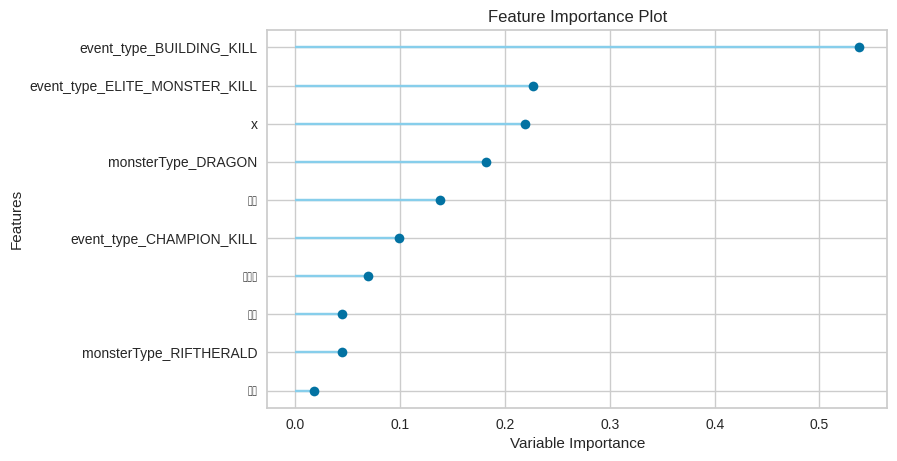

In [ ]:
plot_model(model_lr_info_name, plot='feature')

## 부분

In [ ]:
train = train_info_name_part

In [ ]:
train

,ad,air,ap,combi_win,event_type_BUILDING_KILL,event_type_CHAMPION_KILL,event_type_ELITE_MONSTER_KILL,monsterType_DRAGON,monsterType_RIFTHERALD,slow,stun,x,누커,보조,브루저,탱커,포킹
0,3.0,1.0,1.0,1.0,1.0,11.0,1.0,1.0,0.0,3.0,4.0,1.0,2.0,0.0,0.0,1.0,2.0
2,3.0,4.0,1.0,1.0,2.0,15.0,2.0,1.0,1.0,5.0,2.0,1.0,0.0,0.0,3.0,1.0,1.0
4,2.0,3.0,2.0,1.0,1.0,21.0,3.0,2.0,1.0,4.0,2.0,1.0,1.0,0.0,2.0,1.0,2.0
6,5.0,3.0,0.0,1.0,3.0,12.0,0.0,0.0,0.0,5.0,4.0,0.0,1.0,0.0,2.0,0.0,1.0
8,3.0,2.0,1.0,1.0,3.0,20.0,1.0,0.0,1.0,4.0,5.0,1.0,1.0,0.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22841,3.0,3.0,1.0,0.0,0.0,10.0,0.0,0.0,0.0,6.0,4.0,1.0,0.0,1.0,3.0,0.0,3.0
22843,3.0,1.0,1.0,0.0,0.0,12.0,0.0,0.0,0.0,3.0,3.0,1.0,1.0,0.0,1.0,1.0,2.0
22846,2.0,2.0,2.0,0.0,0.0,16.0,2.0,1.0,1.0,4.0,3.0,1.0,1.0,1.0,2.0,0.0,4.0
22847,3.0,5.0,1.0,0.0,2.0,7.0,1.0,0.0,1.0,5.0,2.0,1.0,0.0,0.0,2.0,1.0,1.0


In [ ]:
test = train[-1000:]
train = train[:-1000]

In [ ]:
train_15min_4 = setup(data = train , target='combi_win')

,Description,Value
0,session_id,8752
1,Target,combi_win
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(10423, 17)"
5,Missing Values,False
6,Numeric Features,16
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
top5_info_name_part = compare_models(fold = 5, round = 3, sort = 'AUC', n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.692,0.763,0.695,0.713,0.704,0.383,0.383,0.184
lda,Linear Discriminant Analysis,0.690,0.762,0.683,0.716,0.699,0.380,0.380,0.042
gbc,Gradient Boosting Classifier,0.690,0.760,0.699,0.710,0.704,0.379,0.380,0.596
ada,Ada Boost Classifier,0.689,0.758,0.698,0.709,0.703,0.377,0.377,0.292
catboost,CatBoost Classifier,0.682,0.752,0.692,0.701,0.696,0.362,0.363,2.806
nb,Naive Bayes,0.673,0.745,0.627,0.717,0.669,0.349,0.352,0.036
lightgbm,Light Gradient Boosting Machine,0.675,0.744,0.678,0.697,0.687,0.349,0.349,0.152
rf,Random Forest Classifier,0.668,0.730,0.673,0.690,0.681,0.336,0.336,1.068
et,Extra Trees Classifier,0.663,0.715,0.680,0.681,0.680,0.324,0.324,1.040
knn,K Neighbors Classifier,0.641,0.687,0.651,0.662,0.656,0.280,0.280,0.278


In [ ]:
blended_info_name_all = blend_models(estimator_list = top5_info_name_part , fold = 5, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6897,0.7610,0.6931,0.7107,0.7018,0.3785,0.3787
1,0.6833,0.7603,0.6866,0.7049,0.6957,0.3658,0.3659
2,0.6971,0.7721,0.6931,0.7212,0.7069,0.3937,0.3940
3,0.6984,0.7618,0.6970,0.7214,0.7090,0.3962,0.3965
4,0.6847,0.7603,0.6944,0.7036,0.6990,0.3680,0.3681
Mean,0.6907,0.7631,0.6928,0.7124,0.7025,0.3805,0.3806
SD,0.0062,0.0045,0.0034,0.0077,0.0049,0.0126,0.0127


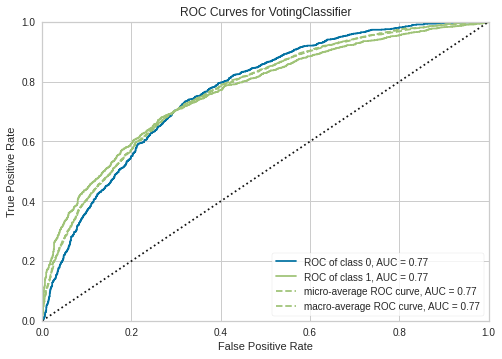

In [ ]:
plot_model(blended_info_name_all, plot='auc')

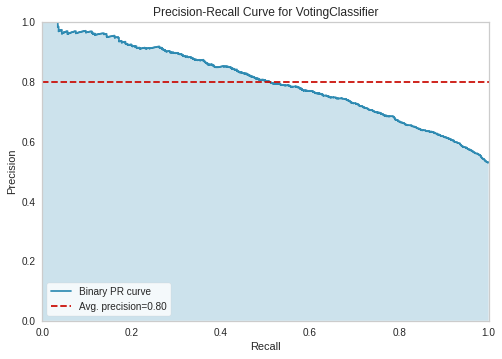

In [ ]:
plot_model(blended_info_name_all, plot='pr')

In [ ]:
model_lr_info_name = create_model('lr', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6911,0.7606,0.7035,0.7081,0.7058,0.3807,0.3807
1,0.6909,0.7611,0.6892,0.7143,0.7015,0.3812,0.3815
2,0.7025,0.7728,0.7022,0.7248,0.7133,0.4044,0.4046
3,0.6916,0.7588,0.6866,0.7164,0.7012,0.3828,0.3832
4,0.6833,0.7623,0.6918,0.7028,0.6972,0.3654,0.3654
Mean,0.6919,0.7631,0.6947,0.7133,0.7038,0.3829,0.3831
SD,0.0061,0.0050,0.0069,0.0075,0.0055,0.0125,0.0125


In [ ]:
model_lr_info_name = tune_model(model_lr_info_name, fold=5, optimize = 'AUC', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6918,0.7609,0.7035,0.7090,0.7063,0.3821,0.3821
1,0.6909,0.7611,0.6892,0.7143,0.7015,0.3812,0.3815
2,0.7019,0.7730,0.7022,0.7239,0.7129,0.4030,0.4032
3,0.6923,0.7589,0.6866,0.7174,0.7017,0.3842,0.3846
4,0.6833,0.7623,0.6918,0.7028,0.6972,0.3654,0.3654
Mean,0.6920,0.7632,0.6947,0.7135,0.7039,0.3832,0.3834
SD,0.0059,0.0050,0.0069,0.0072,0.0053,0.0120,0.0120


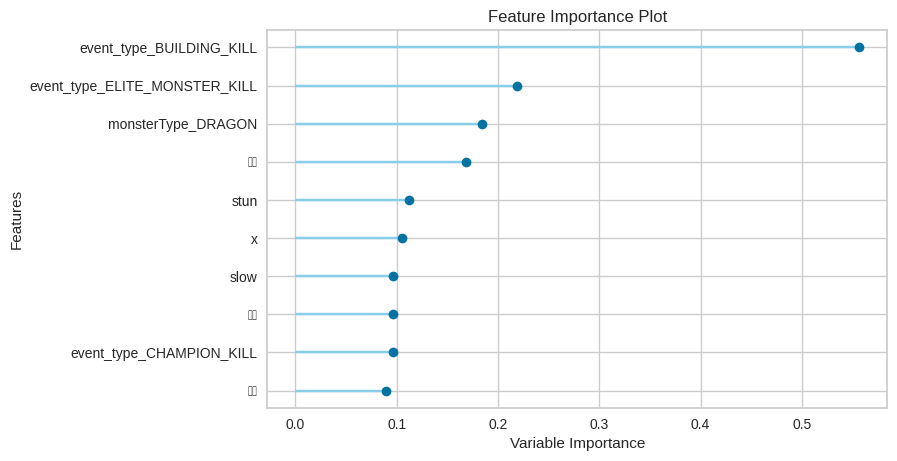

In [ ]:
plot_model(model_lr_info_name, plot='feature')

## 블루 레드 분할

In [ ]:
blue_team

,bluefirstBlood,bluefirstInhibitor,bluefirstTower,bluefirstDragon,bluefirstRiftHerald,event_type_BUILDING_KILL,event_type_CHAMPION_KILL,monsterType_DRAGON,monsterType_RIFTHERALD,death,combi_win,ad,ap,x,포킹,브루저,누커,탱커,보조,slow,stun,air
0,0,1,1,1,0,1,11,1,0,18,1,3.0,1.0,1.0,2.0,0.0,2.0,1.0,0.0,3.0,4.0,1.0
2,1,0,1,0,1,2,15,1,1,6,1,3.0,1.0,1.0,1.0,3.0,0.0,1.0,0.0,5.0,2.0,4.0
4,0,1,1,1,1,1,21,2,1,12,1,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,4.0,2.0,3.0
6,0,1,0,0,0,3,12,0,0,13,1,5.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,5.0,4.0,3.0
8,1,1,1,1,1,3,20,0,1,8,1,3.0,1.0,1.0,3.0,2.0,1.0,1.0,0.0,4.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23841,0,0,0,1,0,0,8,1,0,9,0,3.0,1.0,1.0,1.0,3.0,0.0,0.0,1.0,4.0,3.0,2.0
23843,1,1,1,1,1,0,9,1,1,11,1,2.0,2.0,1.0,3.0,3.0,0.0,1.0,0.0,4.0,5.0,2.0
23845,1,1,0,1,0,0,7,1,0,12,1,2.0,1.0,2.0,2.0,1.0,1.0,2.0,0.0,4.0,4.0,0.0
23847,1,0,1,1,1,2,23,1,1,14,1,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0,3.0,1.0


In [ ]:
red_team

,redfirstBlood,redfirstInhibitor,redfristTower,redfirstDragon,redfirstRiftHerald,event_type_BUILDING_KILL,event_type_CHAMPION_KILL,monsterType_DRAGON,monsterType_RIFTHERALD,death,combi_win,ad,ap,x,포킹,브루저,누커,탱커,보조,slow,stun,air
1,1,0,0,0,1,2,18,1,1,11,0,3.0,1.0,1.0,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0
3,0,0,0,1,0,0,6,1,0,15,0,4.0,1.0,0.0,2.0,3.0,1.0,0.0,0.0,2.0,4.0,2.0
5,1,0,0,0,0,2,12,0,0,21,0,3.0,1.0,1.0,1.0,3.0,0.0,0.0,1.0,4.0,2.0,1.0
7,1,0,1,1,1,0,13,0,1,12,0,3.0,1.0,1.0,3.0,2.0,0.0,0.0,1.0,2.0,2.0,1.0
9,0,0,0,0,0,1,8,0,0,20,0,2.0,2.0,1.0,0.0,3.0,0.0,1.0,0.0,3.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23842,1,0,1,0,1,1,20,1,1,21,1,3.0,1.0,1.0,2.0,2.0,0.0,1.0,0.0,2.0,3.0,4.0
23844,0,0,0,0,0,1,11,0,0,15,0,2.0,2.0,1.0,0.0,3.0,0.0,1.0,0.0,3.0,5.0,2.0
23846,0,0,1,0,1,1,11,0,1,21,0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,4.0,1.0
23848,0,0,0,0,0,1,14,0,0,10,0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,6.0,1.0


### blue

In [ ]:
train = blue_team

In [ ]:
train = train.rename(columns={"포킹":"Poking","브루저":"Buriser","누커":"Nuker","탱커":"Tanker","보조":"Supporter"})
test = train[-1000:]
train = train[:-1000]

In [ ]:
train_15min_4 = setup(data = train , target='combi_win')

,Description,Value
0,session_id,4556
1,Target,combi_win
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10891, 22)"
5,Missing Values,False
6,Numeric Features,16
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
top5_info_name_part = compare_models(fold = 5, round = 3, sort = 'AUC', n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.863,0.925,0.841,0.882,0.861,0.725,0.726,0.924
gbc,Gradient Boosting Classifier,0.861,0.925,0.848,0.873,0.860,0.722,0.722,0.696
lda,Linear Discriminant Analysis,0.857,0.924,0.803,0.904,0.850,0.715,0.720,0.046
catboost,CatBoost Classifier,0.861,0.924,0.847,0.874,0.860,0.722,0.723,2.762
lightgbm,Light Gradient Boosting Machine,0.860,0.921,0.847,0.871,0.859,0.719,0.719,0.260
ada,Ada Boost Classifier,0.855,0.920,0.825,0.880,0.851,0.709,0.711,0.300
nb,Naive Bayes,0.853,0.919,0.848,0.860,0.854,0.707,0.707,0.028
rf,Random Forest Classifier,0.857,0.917,0.843,0.870,0.856,0.714,0.715,0.992
et,Extra Trees Classifier,0.852,0.914,0.839,0.864,0.851,0.703,0.704,0.978
qda,Quadratic Discriminant Analysis,0.789,0.860,0.803,0.788,0.795,0.578,0.578,0.034


In [ ]:
blended_info_name_all = blend_models(estimator_list = top5_info_name_part , fold = 5, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8623,0.9186,0.8390,0.8825,0.8602,0.7247,0.7256
1,0.8702,0.9314,0.8571,0.8824,0.8696,0.7404,0.7407
2,0.8708,0.9334,0.8405,0.8975,0.8681,0.7418,0.7433
3,0.8648,0.9316,0.8429,0.8842,0.8630,0.7298,0.7306
4,0.8465,0.9145,0.8182,0.8702,0.8434,0.6931,0.6943
Mean,0.8629,0.9259,0.8395,0.8833,0.8608,0.7259,0.7269
SD,0.0088,0.0078,0.0125,0.0087,0.0094,0.0176,0.0175


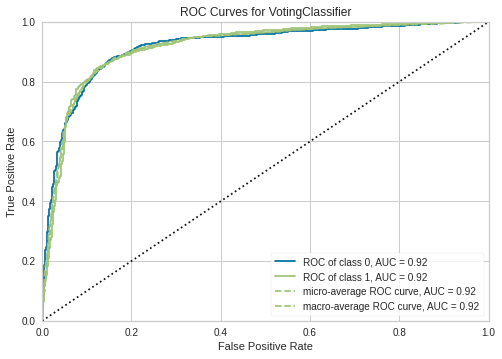

In [ ]:
plot_model(blended_info_name_all, plot='auc')

In [ ]:
model_lr_info_name = create_model('lr', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8630,0.9179,0.8442,0.8796,0.8615,0.7260,0.7266
1,0.8643,0.9277,0.8571,0.8719,0.8644,0.7285,0.7286
2,0.8748,0.9329,0.8470,0.8994,0.8724,0.7496,0.7509
3,0.8655,0.9312,0.8390,0.8886,0.8631,0.7311,0.7323
4,0.8458,0.9138,0.8156,0.8710,0.8424,0.6918,0.6932
Mean,0.8627,0.9247,0.8406,0.8821,0.8608,0.7254,0.7263
SD,0.0094,0.0075,0.0138,0.0107,0.0099,0.0188,0.0187


In [ ]:
model_lr_info_name = tune_model(model_lr_info_name, fold=5, optimize = 'AUC', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8616,0.9180,0.8403,0.8803,0.8598,0.7234,0.7241
1,0.8656,0.9278,0.8532,0.8772,0.8650,0.7312,0.7315
2,0.8734,0.9329,0.8431,0.9003,0.8707,0.7470,0.7486
3,0.8648,0.9313,0.8377,0.8884,0.8623,0.7298,0.7310
4,0.8465,0.9139,0.8143,0.8733,0.8427,0.6931,0.6947
Mean,0.8624,0.9247,0.8377,0.8839,0.8601,0.7249,0.7260
SD,0.0089,0.0075,0.0128,0.0096,0.0094,0.0177,0.0176


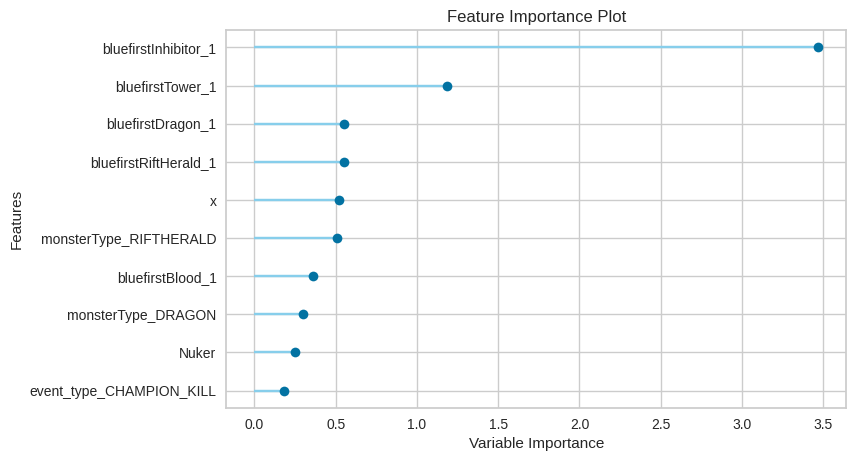

In [ ]:
plot_model(model_lr_info_name, plot='feature')

### red

In [ ]:
train = red_team

In [ ]:
train = train.rename(columns={"포킹":"Poking","브루저":"Buriser","누커":"Nuker","탱커":"Tanker","보조":"Supporter"})
test = train[-1000:]
train = train[:-1000]

In [ ]:
train_15min_4 = setup(data = train , target='combi_win')

,Description,Value
0,session_id,7959
1,Target,combi_win
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10902, 22)"
5,Missing Values,False
6,Numeric Features,16
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
top5_info_name_part = compare_models(fold = 5, round = 3, sort = 'AUC', n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.845,0.908,0.808,0.871,0.838,0.691,0.692,0.146
gbc,Gradient Boosting Classifier,0.845,0.908,0.812,0.867,0.839,0.690,0.691,0.702
lda,Linear Discriminant Analysis,0.842,0.908,0.773,0.895,0.829,0.685,0.691,0.046
catboost,CatBoost Classifier,0.847,0.906,0.814,0.868,0.840,0.693,0.694,2.766
ada,Ada Boost Classifier,0.841,0.904,0.801,0.868,0.833,0.681,0.683,0.298
lightgbm,Light Gradient Boosting Machine,0.840,0.903,0.809,0.861,0.834,0.681,0.682,0.160
nb,Naive Bayes,0.835,0.902,0.814,0.847,0.830,0.669,0.670,0.028
rf,Random Forest Classifier,0.842,0.902,0.809,0.864,0.835,0.684,0.685,0.992
et,Extra Trees Classifier,0.833,0.898,0.801,0.853,0.826,0.666,0.667,0.964
qda,Quadratic Discriminant Analysis,0.769,0.817,0.628,0.697,0.661,0.537,0.540,0.032


In [ ]:
blended_info_name_all = blend_models(estimator_list = top5_info_name_part , fold = 5, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8671,0.9242,0.8164,0.9062,0.8589,0.7339,0.7375
1,0.8296,0.9030,0.7910,0.8543,0.8214,0.6590,0.6608
2,0.8447,0.9010,0.7939,0.8812,0.8353,0.6891,0.6925
3,0.8539,0.9144,0.8177,0.8793,0.8474,0.7076,0.7093
4,0.8427,0.9050,0.7939,0.8774,0.8336,0.6852,0.6883
Mean,0.8476,0.9095,0.8026,0.8797,0.8393,0.6949,0.6976
SD,0.0124,0.0087,0.0119,0.0165,0.0128,0.0249,0.0253


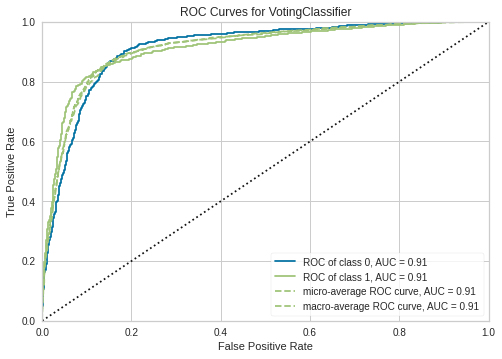

In [ ]:
plot_model(blended_info_name_all, plot='auc')

In [ ]:
model_lr_info_name = create_model('lr', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8638,0.9239,0.8243,0.8927,0.8571,0.7274,0.7295
1,0.8316,0.9027,0.8108,0.8432,0.8267,0.6630,0.6635
2,0.8421,0.9001,0.7886,0.8805,0.8321,0.6839,0.6876
3,0.8512,0.9127,0.8243,0.8691,0.8461,0.7024,0.7033
4,0.8381,0.9015,0.7939,0.8685,0.8295,0.6760,0.6785
Mean,0.8454,0.9082,0.8084,0.8708,0.8383,0.6905,0.6925
SD,0.0112,0.0090,0.0149,0.0164,0.0115,0.0224,0.0226


In [ ]:
model_lr_info_name = tune_model(model_lr_info_name, fold=5, optimize = 'AUC', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8657,0.9238,0.8283,0.8932,0.8595,0.7313,0.7332
1,0.8316,0.9027,0.8108,0.8432,0.8267,0.6630,0.6635
2,0.8421,0.9001,0.7913,0.8783,0.8325,0.6839,0.6872
3,0.8519,0.9127,0.8256,0.8693,0.8469,0.7037,0.7045
4,0.8394,0.9015,0.7992,0.8668,0.8316,0.6787,0.6807
Mean,0.8462,0.9082,0.8110,0.8701,0.8394,0.6921,0.6938
SD,0.0118,0.0090,0.0144,0.0163,0.0121,0.0235,0.0237


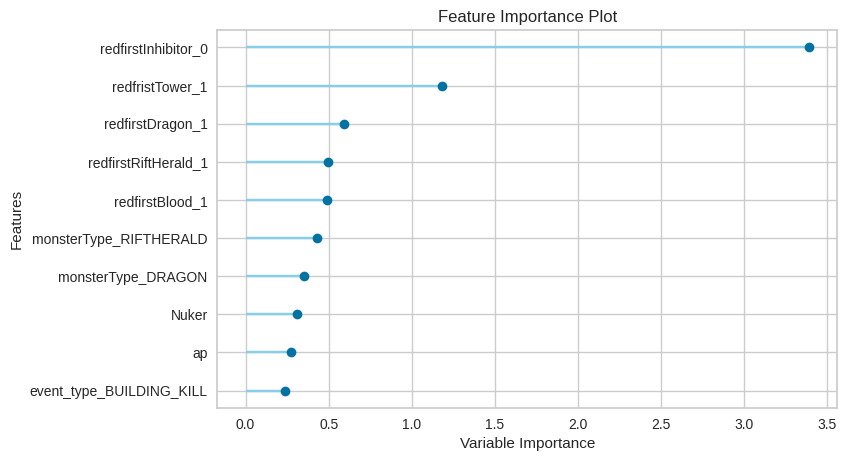

In [ ]:
plot_model(model_lr_info_name, plot='feature')

### 둘다

In [ ]:
blue_team

,bluefirstBlood,bluefirstInhibitor,bluefirstTower,bluefirstDragon,bluefirstRiftHerald,event_type_BUILDING_KILL,event_type_CHAMPION_KILL,monsterType_DRAGON,monsterType_RIFTHERALD,death,combi_win,ad,ap,x,포킹,브루저,누커,탱커,보조,slow,stun,air
0,0,1,1,1,0,1,11,1,0,18,1,3.0,1.0,1.0,2.0,0.0,2.0,1.0,0.0,3.0,4.0,1.0
2,1,0,1,0,1,2,15,1,1,6,1,3.0,1.0,1.0,1.0,3.0,0.0,1.0,0.0,5.0,2.0,4.0
4,0,1,1,1,1,1,21,2,1,12,1,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,4.0,2.0,3.0
6,0,1,0,0,0,3,12,0,0,13,1,5.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,5.0,4.0,3.0
8,1,1,1,1,1,3,20,0,1,8,1,3.0,1.0,1.0,3.0,2.0,1.0,1.0,0.0,4.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23841,0,0,0,1,0,0,8,1,0,9,0,3.0,1.0,1.0,1.0,3.0,0.0,0.0,1.0,4.0,3.0,2.0
23843,1,1,1,1,1,0,9,1,1,11,1,2.0,2.0,1.0,3.0,3.0,0.0,1.0,0.0,4.0,5.0,2.0
23845,1,1,0,1,0,0,7,1,0,12,1,2.0,1.0,2.0,2.0,1.0,1.0,2.0,0.0,4.0,4.0,0.0
23847,1,0,1,1,1,2,23,1,1,14,1,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0,3.0,1.0


In [ ]:
red_team

,redfirstBlood,redfirstInhibitor,redfristTower,redfirstDragon,redfirstRiftHerald,event_type_BUILDING_KILL,event_type_CHAMPION_KILL,monsterType_DRAGON,monsterType_RIFTHERALD,death,combi_win,ad,ap,x,포킹,브루저,누커,탱커,보조,slow,stun,air
1,1,0,0,0,1,2,18,1,1,11,0,3.0,1.0,1.0,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0
3,0,0,0,1,0,0,6,1,0,15,0,4.0,1.0,0.0,2.0,3.0,1.0,0.0,0.0,2.0,4.0,2.0
5,1,0,0,0,0,2,12,0,0,21,0,3.0,1.0,1.0,1.0,3.0,0.0,0.0,1.0,4.0,2.0,1.0
7,1,0,1,1,1,0,13,0,1,12,0,3.0,1.0,1.0,3.0,2.0,0.0,0.0,1.0,2.0,2.0,1.0
9,0,0,0,0,0,1,8,0,0,20,0,2.0,2.0,1.0,0.0,3.0,0.0,1.0,0.0,3.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23842,1,0,1,0,1,1,20,1,1,21,1,3.0,1.0,1.0,2.0,2.0,0.0,1.0,0.0,2.0,3.0,4.0
23844,0,0,0,0,0,1,11,0,0,15,0,2.0,2.0,1.0,0.0,3.0,0.0,1.0,0.0,3.0,5.0,2.0
23846,0,0,1,0,1,1,11,0,1,21,0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,4.0,1.0
23848,0,0,0,0,0,1,14,0,0,10,0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,6.0,1.0


In [ ]:
blue_team2 = blue_team.rename(columns={"bluefirstBlood":"firstBlood","bluefirstInhibitor":"firstInhibitor","bluefirstTower":"firstTower","bluefirstDragon":"firstDragon","bluefirstRiftHerald":"firstRiftHerald"})
red_team2 = red_team.rename(columns={"redfirstBlood":"firstBlood","redfirstInhibitor":"firstInhibitor","redfristTower":"firstTower","redfirstDragon":"firstDragon","redfirstRiftHerald":"firstRiftHerald"})

In [ ]:
blue_team2

,firstBlood,firstInhibitor,firstTower,firstDragon,firstRiftHerald,event_type_BUILDING_KILL,event_type_CHAMPION_KILL,monsterType_DRAGON,monsterType_RIFTHERALD,death,combi_win,ad,ap,x,포킹,브루저,누커,탱커,보조,slow,stun,air
0,0,1,1,1,0,1,11,1,0,18,1,3.0,1.0,1.0,2.0,0.0,2.0,1.0,0.0,3.0,4.0,1.0
2,1,0,1,0,1,2,15,1,1,6,1,3.0,1.0,1.0,1.0,3.0,0.0,1.0,0.0,5.0,2.0,4.0
4,0,1,1,1,1,1,21,2,1,12,1,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,4.0,2.0,3.0
6,0,1,0,0,0,3,12,0,0,13,1,5.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,5.0,4.0,3.0
8,1,1,1,1,1,3,20,0,1,8,1,3.0,1.0,1.0,3.0,2.0,1.0,1.0,0.0,4.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23841,0,0,0,1,0,0,8,1,0,9,0,3.0,1.0,1.0,1.0,3.0,0.0,0.0,1.0,4.0,3.0,2.0
23843,1,1,1,1,1,0,9,1,1,11,1,2.0,2.0,1.0,3.0,3.0,0.0,1.0,0.0,4.0,5.0,2.0
23845,1,1,0,1,0,0,7,1,0,12,1,2.0,1.0,2.0,2.0,1.0,1.0,2.0,0.0,4.0,4.0,0.0
23847,1,0,1,1,1,2,23,1,1,14,1,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0,3.0,1.0


In [ ]:
red_team2

,firstBlood,firstInhibitor,firstTower,firstDragon,firstRiftHerald,event_type_BUILDING_KILL,event_type_CHAMPION_KILL,monsterType_DRAGON,monsterType_RIFTHERALD,death,combi_win,ad,ap,x,포킹,브루저,누커,탱커,보조,slow,stun,air
1,1,0,0,0,1,2,18,1,1,11,0,3.0,1.0,1.0,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0
3,0,0,0,1,0,0,6,1,0,15,0,4.0,1.0,0.0,2.0,3.0,1.0,0.0,0.0,2.0,4.0,2.0
5,1,0,0,0,0,2,12,0,0,21,0,3.0,1.0,1.0,1.0,3.0,0.0,0.0,1.0,4.0,2.0,1.0
7,1,0,1,1,1,0,13,0,1,12,0,3.0,1.0,1.0,3.0,2.0,0.0,0.0,1.0,2.0,2.0,1.0
9,0,0,0,0,0,1,8,0,0,20,0,2.0,2.0,1.0,0.0,3.0,0.0,1.0,0.0,3.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23842,1,0,1,0,1,1,20,1,1,21,1,3.0,1.0,1.0,2.0,2.0,0.0,1.0,0.0,2.0,3.0,4.0
23844,0,0,0,0,0,1,11,0,0,15,0,2.0,2.0,1.0,0.0,3.0,0.0,1.0,0.0,3.0,5.0,2.0
23846,0,0,1,0,1,1,11,0,1,21,0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,4.0,1.0
23848,0,0,0,0,0,1,14,0,0,10,0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,6.0,1.0


In [ ]:
all_team = pd.concat([blue_team2,red_team2])

In [ ]:
all_team

,firstBlood,firstInhibitor,firstTower,firstDragon,firstRiftHerald,event_type_BUILDING_KILL,event_type_CHAMPION_KILL,monsterType_DRAGON,monsterType_RIFTHERALD,death,combi_win,ad,ap,x,포킹,브루저,누커,탱커,보조,slow,stun,air
0,0,1,1,1,0,1,11,1,0,18,1,3.0,1.0,1.0,2.0,0.0,2.0,1.0,0.0,3.0,4.0,1.0
2,1,0,1,0,1,2,15,1,1,6,1,3.0,1.0,1.0,1.0,3.0,0.0,1.0,0.0,5.0,2.0,4.0
4,0,1,1,1,1,1,21,2,1,12,1,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,4.0,2.0,3.0
6,0,1,0,0,0,3,12,0,0,13,1,5.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,5.0,4.0,3.0
8,1,1,1,1,1,3,20,0,1,8,1,3.0,1.0,1.0,3.0,2.0,1.0,1.0,0.0,4.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23842,1,0,1,0,1,1,20,1,1,21,1,3.0,1.0,1.0,2.0,2.0,0.0,1.0,0.0,2.0,3.0,4.0
23844,0,0,0,0,0,1,11,0,0,15,0,2.0,2.0,1.0,0.0,3.0,0.0,1.0,0.0,3.0,5.0,2.0
23846,0,0,1,0,1,1,11,0,1,21,0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,4.0,1.0
23848,0,0,0,0,0,1,14,0,0,10,0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,6.0,1.0


In [ ]:
train = all_team

In [ ]:
train = train.rename(columns={"포킹":"Poking","브루저":"Buriser","누커":"Nuker","탱커":"Tanker","보조":"Supporter"})
test = train[-1000:]
train = train[:-1000]

In [ ]:
train_15min_4 = setup(data = train , target='combi_win')

,Description,Value
0,session_id,8378
1,Target,combi_win
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(22793, 22)"
5,Missing Values,False
6,Numeric Features,16
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
top5_info_name_part = compare_models(fold = 5, round = 3, sort = 'AUC', n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.851,0.915,0.824,0.870,0.846,0.702,0.703,1.424
catboost,CatBoost Classifier,0.851,0.915,0.827,0.868,0.847,0.702,0.703,6.160
lr,Logistic Regression,0.852,0.914,0.821,0.874,0.847,0.703,0.705,1.026
lda,Linear Discriminant Analysis,0.848,0.914,0.784,0.898,0.837,0.696,0.702,0.096
lightgbm,Light Gradient Boosting Machine,0.850,0.913,0.826,0.867,0.846,0.700,0.701,0.382
ada,Ada Boost Classifier,0.848,0.912,0.808,0.877,0.841,0.695,0.698,0.538
rf,Random Forest Classifier,0.847,0.911,0.822,0.865,0.843,0.694,0.695,1.622
nb,Naive Bayes,0.841,0.907,0.823,0.853,0.838,0.683,0.683,0.058
qda,Quadratic Discriminant Analysis,0.843,0.907,0.788,0.884,0.833,0.685,0.690,0.068
et,Extra Trees Classifier,0.843,0.907,0.822,0.856,0.839,0.685,0.686,1.634


In [ ]:
blended_info_name_all = blend_models(estimator_list = top5_info_name_part , fold = 5, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8543,0.9142,0.8264,0.8743,0.8497,0.7085,0.7096
1,0.8543,0.9180,0.8157,0.8829,0.8480,0.7085,0.7105
2,0.8480,0.9165,0.8170,0.8701,0.8427,0.6960,0.6972
3,0.8490,0.9139,0.8156,0.8727,0.8432,0.6978,0.6993
4,0.8571,0.9185,0.8200,0.8846,0.8511,0.7141,0.7160
Mean,0.8525,0.9162,0.8189,0.8769,0.8469,0.7050,0.7065
SD,0.0035,0.0019,0.0041,0.0058,0.0034,0.0069,0.0071


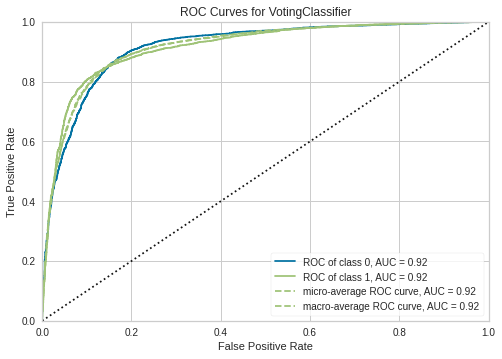

In [ ]:
plot_model(blended_info_name_all, plot='auc')

In [ ]:
model_gbc_info_name = create_model('gbc', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8521,0.9130,0.8302,0.8673,0.8483,0.7041,0.7048
1,0.8508,0.9166,0.8220,0.8713,0.8460,0.7016,0.7027
2,0.8474,0.9155,0.8239,0.8635,0.8433,0.6947,0.6954
3,0.8483,0.9124,0.8188,0.8691,0.8432,0.6966,0.6977
4,0.8565,0.9162,0.8244,0.8798,0.8512,0.7129,0.7143
Mean,0.8510,0.9147,0.8239,0.8702,0.8464,0.7020,0.7030
SD,0.0032,0.0017,0.0037,0.0054,0.0031,0.0064,0.0066


In [ ]:
model_gbc_info_name = tune_model(model_gbc_info_name, fold=5, optimize = 'AUC', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5017,0.9134,0.0,0.0,0.0,0.0,0.0
1,0.5017,0.9170,0.0,0.0,0.0,0.0,0.0
2,0.5017,0.9138,0.0,0.0,0.0,0.0,0.0
3,0.5020,0.9123,0.0,0.0,0.0,0.0,0.0
4,0.5020,0.9151,0.0,0.0,0.0,0.0,0.0
Mean,0.5018,0.9143,0.0,0.0,0.0,0.0,0.0
SD,0.0002,0.0016,0.0,0.0,0.0,0.0,0.0


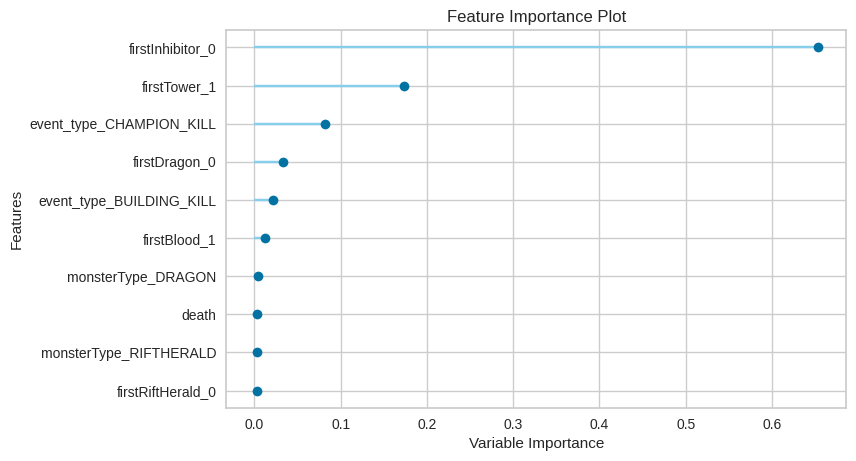

In [ ]:
plot_model(model_gbc_info_name, plot='feature')

In [ ]:
# 퍼스트 타워 / 퍼스트 킬 /  퍼스트 용 / 퍼스트 전령 /  킬 / 데스 / 용 갯수 / 전령 갯수
# 억제기만 뺀거

### 억제기만 뺀거

In [ ]:
train = all_team.drop(columns = ['firstInhibitor'])

In [ ]:
train = train.rename(columns={"포킹":"Poking","브루저":"Buriser","누커":"Nuker","탱커":"Tanker","보조":"Supporter"})
test = train[-1000:]
train = train[:-1000]

In [343]:
train_15min_4 = setup(data = train , target='combi_win')

,Description,Value
0,session_id,5058
1,Target,combi_win
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(22793, 21)"
5,Missing Values,False
6,Numeric Features,16
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [344]:
top5_info_name_part = compare_models(fold = 5, round = 3, sort = 'AUC', n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.746,0.823,0.739,0.750,0.745,0.493,0.493,1.118
gbc,Gradient Boosting Classifier,0.744,0.822,0.729,0.752,0.740,0.489,0.489,1.364
lda,Linear Discriminant Analysis,0.746,0.822,0.739,0.750,0.745,0.493,0.493,0.072
ada,Ada Boost Classifier,0.744,0.821,0.733,0.750,0.741,0.489,0.489,0.500
lightgbm,Light Gradient Boosting Machine,0.739,0.817,0.727,0.746,0.736,0.478,0.479,0.360
catboost,CatBoost Classifier,0.741,0.817,0.726,0.749,0.737,0.482,0.483,6.078
rf,Random Forest Classifier,0.734,0.806,0.721,0.740,0.730,0.467,0.467,1.726
qda,Quadratic Discriminant Analysis,0.731,0.806,0.785,0.709,0.745,0.462,0.466,0.046
nb,Naive Bayes,0.727,0.805,0.703,0.739,0.721,0.454,0.455,0.040
et,Extra Trees Classifier,0.728,0.796,0.723,0.730,0.726,0.456,0.456,1.724


In [345]:
blended_info_name_all = blend_models(estimator_list = top5_info_name_part , fold = 5, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7452,0.8212,0.7519,0.7421,0.7470,0.4904,0.4905
1,0.7496,0.8312,0.7256,0.7623,0.7435,0.4992,0.4998
2,0.7411,0.8203,0.7419,0.7409,0.7414,0.4823,0.4823
3,0.7452,0.8254,0.7287,0.7537,0.7410,0.4904,0.4907
4,0.7440,0.8204,0.7229,0.7546,0.7384,0.4879,0.4884
Mean,0.7450,0.8237,0.7342,0.7507,0.7422,0.4901,0.4903
SD,0.0027,0.0042,0.0110,0.0081,0.0029,0.0055,0.0056


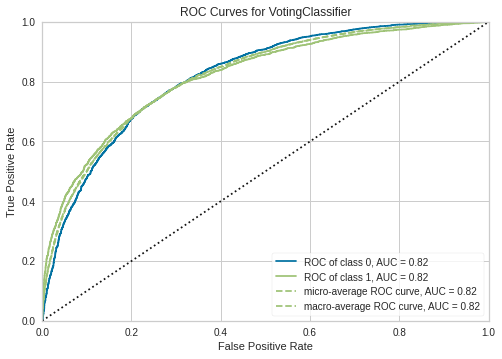

In [346]:
plot_model(blended_info_name_all, plot='auc')

In [347]:
model_lr_info_name = create_model('lr', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7468,0.8216,0.7538,0.7435,0.7486,0.4936,0.4936
1,0.7565,0.8308,0.7381,0.7664,0.7520,0.5130,0.5134
2,0.7408,0.8178,0.7425,0.7402,0.7413,0.4817,0.4817
3,0.7421,0.8250,0.7287,0.7489,0.7386,0.4842,0.4844
4,0.7458,0.8192,0.7335,0.7519,0.7426,0.4917,0.4918
Mean,0.7464,0.8229,0.7393,0.7502,0.7446,0.4928,0.4930
SD,0.0055,0.0046,0.0086,0.0091,0.0049,0.0110,0.0111


In [348]:
model_lr_info_name = tune_model(model_lr_info_name, fold=5, optimize = 'AUC', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7468,0.8216,0.7538,0.7435,0.7486,0.4936,0.4936
1,0.7565,0.8308,0.7381,0.7664,0.7520,0.5130,0.5134
2,0.7411,0.8178,0.7425,0.7406,0.7416,0.4823,0.4823
3,0.7421,0.8250,0.7287,0.7489,0.7386,0.4842,0.4844
4,0.7462,0.8192,0.7342,0.7521,0.7430,0.4923,0.4925
Mean,0.7465,0.8229,0.7394,0.7503,0.7448,0.4931,0.4932
SD,0.0054,0.0047,0.0085,0.0090,0.0049,0.0109,0.0110


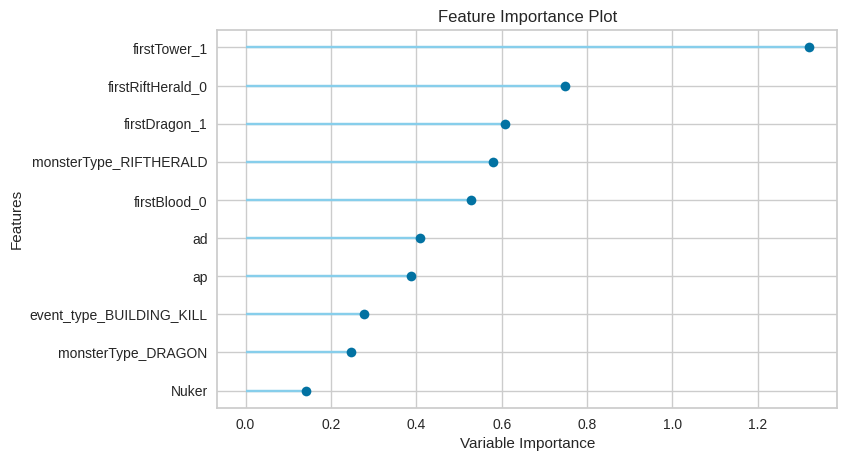

In [349]:
plot_model(model_lr_info_name, plot='feature')

In [350]:
save_model(blended_info_name_all, './15min_predict_model_yes_champ_211004')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='combi_win',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
                                                               learning_rate=0.1,
                                                               max_depth=-1,
                                                               min_child_samples=20,
                              

### 퍼스트 타워 / 퍼스트 킬 /  퍼스트 용 / 퍼스트 전령 /  킬 / 데스 / 용 갯수 / 전령 갯수



In [ ]:
all_team.columns

Index(['firstBlood', 'firstInhibitor', 'firstTower', 'firstDragon',
       'firstRiftHerald', 'event_type_BUILDING_KILL',
       'event_type_CHAMPION_KILL', 'monsterType_DRAGON',
       'monsterType_RIFTHERALD', 'death', 'combi_win', 'ad', 'ap', 'x', '포킹',
       '브루저', '누커', '탱커', '보조', 'slow', 'stun', 'air'],
      dtype='object')

In [359]:
train = all_team[['firstBlood', 'firstTower', 'firstDragon',
       'firstRiftHerald', 'event_type_BUILDING_KILL',
       'event_type_CHAMPION_KILL', 'monsterType_DRAGON',
       'monsterType_RIFTHERALD', 'death', 'combi_win']]

In [360]:
test = train[-1000:]
train = train[:-1000]

In [361]:
train

,firstBlood,firstTower,firstDragon,firstRiftHerald,event_type_BUILDING_KILL,event_type_CHAMPION_KILL,monsterType_DRAGON,monsterType_RIFTHERALD,death,combi_win
0,0,1,1,0,1,11,1,0,18,1
2,1,1,0,1,2,15,1,1,6,1
4,0,1,1,1,1,21,2,1,12,1
6,0,0,0,0,3,12,0,0,13,1
8,1,1,1,1,3,20,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...
21842,0,0,0,0,0,11,0,1,15,0
21844,1,1,1,1,1,19,1,1,13,1
21846,0,1,0,1,1,9,0,1,14,0
21848,1,0,1,1,1,14,0,1,10,1


In [362]:
train.columns

Index(['firstBlood', 'firstTower', 'firstDragon', 'firstRiftHerald',
       'event_type_BUILDING_KILL', 'event_type_CHAMPION_KILL',
       'monsterType_DRAGON', 'monsterType_RIFTHERALD', 'death', 'combi_win'],
      dtype='object')

In [ ]:
train_15min_4 = setup(data = train , target='combi_win')

,Description,Value
0,session_id,6356
1,Target,combi_win
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(22793, 10)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
top5_info_name_part = compare_models(fold = 5, round = 3, sort = 'AUC', n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.745,0.823,0.727,0.754,0.740,0.490,0.490,0.798
lr,Logistic Regression,0.745,0.822,0.736,0.750,0.743,0.491,0.491,0.182
ada,Ada Boost Classifier,0.745,0.822,0.738,0.749,0.743,0.490,0.490,0.392
lda,Linear Discriminant Analysis,0.745,0.822,0.735,0.749,0.742,0.489,0.489,0.050
lightgbm,Light Gradient Boosting Machine,0.740,0.818,0.726,0.746,0.736,0.479,0.480,0.204
catboost,CatBoost Classifier,0.740,0.817,0.723,0.748,0.735,0.480,0.480,5.206
qda,Quadratic Discriminant Analysis,0.736,0.811,0.700,0.754,0.726,0.471,0.473,0.036
nb,Naive Bayes,0.726,0.805,0.703,0.737,0.720,0.452,0.453,0.034
rf,Random Forest Classifier,0.691,0.761,0.687,0.692,0.690,0.382,0.382,1.378
knn,K Neighbors Classifier,0.692,0.751,0.671,0.700,0.685,0.384,0.384,0.306


In [ ]:
blended_info_name_all = blend_models(estimator_list = top5_info_name_part , fold = 5, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7518,0.8308,0.7448,0.7552,0.7500,0.5036,0.5036
1,0.7449,0.8279,0.7166,0.7595,0.7374,0.4898,0.4906
2,0.7446,0.8242,0.7329,0.7503,0.7415,0.4892,0.4893
3,0.7471,0.8212,0.7285,0.7565,0.7423,0.4942,0.4945
4,0.7402,0.8150,0.7428,0.7386,0.7407,0.4804,0.4804
Mean,0.7457,0.8238,0.7331,0.7520,0.7424,0.4914,0.4917
SD,0.0038,0.0055,0.0102,0.0073,0.0042,0.0075,0.0075


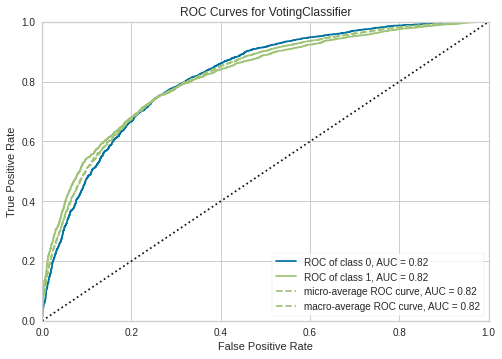

In [ ]:
plot_model(blended_info_name_all, plot='auc')

In [ ]:
model_gbc_info_name = create_model('gbc', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7499,0.8301,0.7361,0.7569,0.7463,0.4998,0.5000
1,0.7449,0.8281,0.7135,0.7612,0.7366,0.4898,0.4908
2,0.7424,0.8222,0.7235,0.7518,0.7374,0.4848,0.4851
3,0.7452,0.8218,0.7229,0.7566,0.7393,0.4904,0.4909
4,0.7415,0.8141,0.7378,0.7429,0.7403,0.4829,0.4829
Mean,0.7448,0.8233,0.7267,0.7539,0.7400,0.4896,0.4900
SD,0.0029,0.0056,0.0090,0.0062,0.0034,0.0059,0.0059


In [ ]:
model_lgbc_info_name = tune_model(model_gbc_info_name, fold=5, optimize = 'AUC', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7493,0.8295,0.7354,0.7563,0.7457,0.4986,0.4988
1,0.7446,0.8260,0.7129,0.7610,0.7362,0.4892,0.4902
2,0.7418,0.8230,0.7260,0.7495,0.7376,0.4835,0.4838
3,0.7474,0.8195,0.7367,0.7527,0.7446,0.4948,0.4949
4,0.7405,0.8150,0.7453,0.7379,0.7416,0.4810,0.4811
Mean,0.7447,0.8226,0.7313,0.7515,0.7411,0.4894,0.4897
SD,0.0033,0.0050,0.0110,0.0078,0.0038,0.0066,0.0066


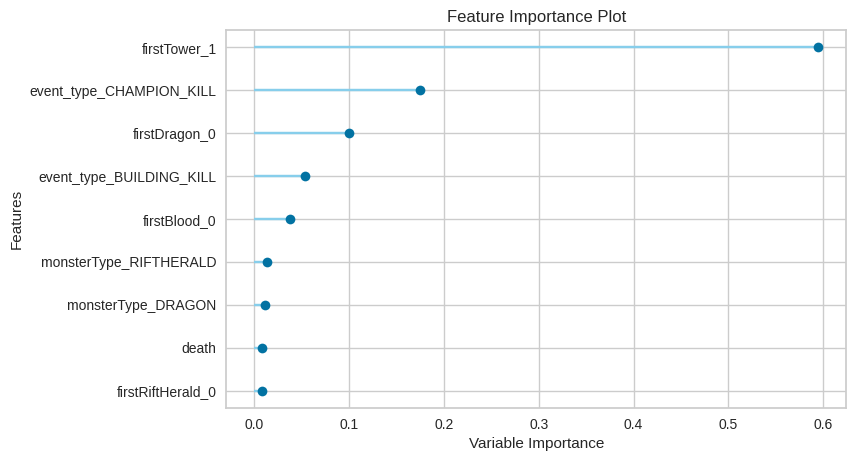

In [ ]:
plot_model(model_gbc_info_name, plot='feature')

In [ ]:
save_model(blended_info_name_all, './15min_predict_model_no_champ_211004')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='combi_win',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
                                                               learning_rate=0.1,
                                                               max_depth=-1,
                                                               min_child_samples=20,
                              

In [ ]:
# 실력- 데